In [3]:
import re
import pandas as pd
from contractions import fix

# 1. Load Beyond Blue data
df_bb = pd.read_csv('data/bb_posts_demo2.csv')

# 2. Define a text‐cleaning function
def clean_text(text: str) -> str:
    if pd.isna(text):
        return ""
    # Remove URLs
    text = re.sub(r"http\S+|www\.\S+", "", text)
    # Strip HTML/Markdown tags and bracketed text
    text = re.sub(r"<.*?>|\[.*?\]", "", text)
    # Expand contractions (“I’m” → “I am”)
    text = fix(text)
    # Collapse repeated characters (“soooo” → “soo”)
    text = re.sub(r"(.)\1{2,}", r"\1\1", text)
    # Normalize whitespace and lowercase
    return " ".join(text.split()).lower()

# 3. Combine post preview + comments into one field, then clean
df_bb['raw_text'] = df_bb['post_preview'].fillna('') + ' ' + df_bb['comments'].fillna('')
df_bb['clean_text'] = df_bb['raw_text'].apply(clean_text)

# 4. Drop rows where nothing remains after cleaning
df_bb = df_bb[df_bb['clean_text'].str.strip().astype(bool)].reset_index(drop=True)

# 5. Inspect the result
print(df_bb[['post_preview', 'comments', 'clean_text']].head())

#6. Save the cleaned DataFrame
df_bb.to_csv('data/bb_posts_cleaned.csv', index=False)
print("Cleaned data saved to 'data/bb_posts_cleaned.csv'")
# 7. Display the cleaned DataFrame
df_bb.head()
# 8. Display the cleaned DataFrame
df_bb.head()

                                        post_preview  \
0  Hi my name is Michelle and I have had Anxiety ...   
1  Hi,   I’ve suffered on and off from anxiety ov...   
2  I have had chronic anxiety since 2016, but I h...   
3  Hello I struggle with very bad anxiety and pan...   
4  I’ve recently sold my mortgage free home that ...   

                                            comments  \
0  Dear Michelle ~ Welcome here to the Support Fo...   
1  Hello new member and welcome to the forum. Ple...   
2  Dear Guest-65543263, I can very much relate to...   
3  Hello any advice please would help ||| Hi don'...   
4  Hi KCT welcome Anxiety is a serious condition ...   

                                          clean_text  
0  hi my name is michelle and i have had anxiety ...  
1  hi, i have suffered on and off from anxiety ov...  
2  i have had chronic anxiety since 2016, but i h...  
3  hello i struggle with very bad anxiety and pan...  
4  i have recently sold my mortgage free home tha..

keyword  page                                       post_preview  \
0  anxiety     1  Hi my name is Michelle and I have had Anxiety ...   
1  anxiety     1  Hi,   I’ve suffered on and off from anxiety ov...   
2  anxiety     1  I have had chronic anxiety since 2016, but I h...   
3  anxiety     1  Hello I struggle with very bad anxiety and pan...   
4  anxiety     1  I’ve recently sold my mortgage free home that ...   

                                          thread_url    post_date  \
0  https://forums.beyondblue.org.au/t5/anxiety/an...  ‎23-05-2025   
1  https://forums.beyondblue.org.au/t5/welcome-an...  ‎28-05-2025   
2  https://forums.beyondblue.org.au/t5/anxiety/an...  ‎06-01-2025   
3  https://forums.beyondblue.org.au/t5/anxiety/an...  ‎04-03-2025   
4  https://forums.beyondblue.org.au/t5/anxiety/an...  ‎04-06-2025   

   num_comments                                           comments  \
0             2  Dear Michelle ~ Welcome here to the Support Fo...   
1             4  Hello new member and welcome to the forum. Ple...   
2             9  Dear Guest-65543263, I can very much relate to...   
3             4  Hello any advice please would help ||| Hi don'...   
4             3  Hi KCT welcome Anxiety is a serious condition ...   

                                            raw_text  \
0  Hi my name is Michelle and I have had Anxiety ...   
1  Hi,   I’ve suffered on and off from anxiety ov...   
2  I have had chronic anxiety since 2016, but I h...   
3  Hello I struggle with very bad anxiety and pan...   
4  I’ve recently sold my mortgage free home that ...   

                                          clean_text  
0  hi my name is michelle and i have had anxiety ...  
1  hi, i have suffered on and off from anxiety ov...  
2  i have had chronic anxiety since 2016, but i h...  
3  hello i struggle with very bad anxiety and pan...  
4  i have recently sold my mortgage free home tha...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the cleaned data
df = pd.read_csv('bb_posts_cleaned.csv')

# Basic data overview
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

=== DATASET OVERVIEW ===
Dataset shape: (12000, 9)
Columns: ['keyword', 'page', 'post_preview', 'thread_url', 'post_date', 'num_comments', 'comments', 'raw_text', 'clean_text']

Data types:
keyword         object
page             int64
post_preview    object
thread_url      object
post_date       object
num_comments     int64
comments        object
raw_text        object
clean_text      object
dtype: object

Missing values:
keyword          0
page             0
post_preview     0
thread_url       0
post_date       74
num_comments     0
comments        21
raw_text         0
clean_text       0
dtype: int64


=== TEXT LENGTH STATISTICS ===
        text_length   word_count
count  12000.000000  12000.00000
mean    5310.701083   1015.52925
std     3557.348824    683.69346
min      146.000000     29.00000
25%     2578.750000    487.75000
50%     4475.500000    854.00000
75%     7243.250000   1388.00000
max    22749.000000   4329.00000


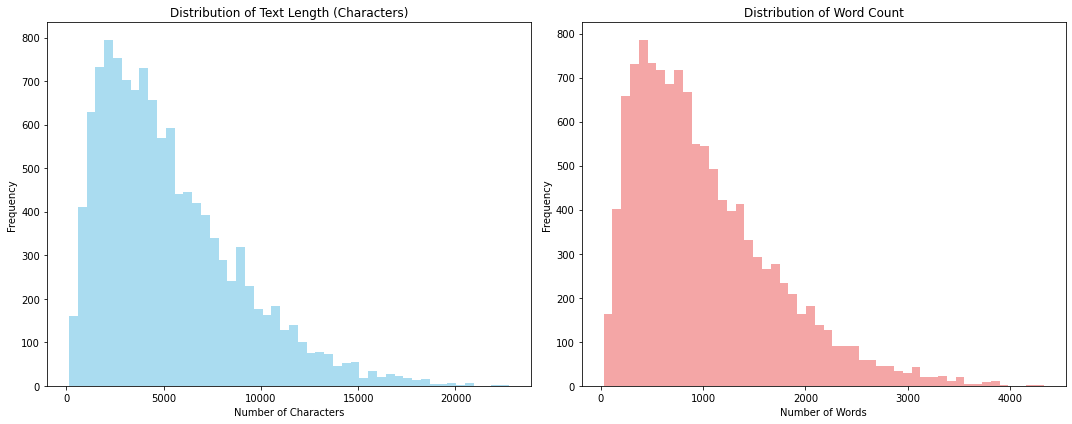

In [ ]:
# Analyse text lengths
df['text_length'] = df['clean_text'].str.len()
df['word_count'] = df['clean_text'].str.split().str.len()

print("=== TEXT LENGTH STATISTICS ===")
print(df[['text_length', 'word_count']].describe())

# Plot text length distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Character length distribution
axes[0].hist(df['text_length'], bins=50, alpha=0.7, color='skyblue')
axes[0].set_title('Distribution of Text Length (Characters)')
axes[0].set_xlabel('Number of Characters')
axes[0].set_ylabel('Frequency')

# Word count distribution
axes[1].hist(df['word_count'], bins=50, alpha=0.7, color='lightcoral')
axes[1].set_title('Distribution of Word Count')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

=== KEYWORD ANALYSIS ===
Keyword distribution:
anxiety              1000
depression           1000
social anxiety       1000
loneliness           1000
panic attack         1000
PTSD                 1000
suicidal thoughts    1000
trauma               1000
OCD                  1000
self harm            1000
people like me       1000
staying well         1000
Name: keyword, dtype: int64


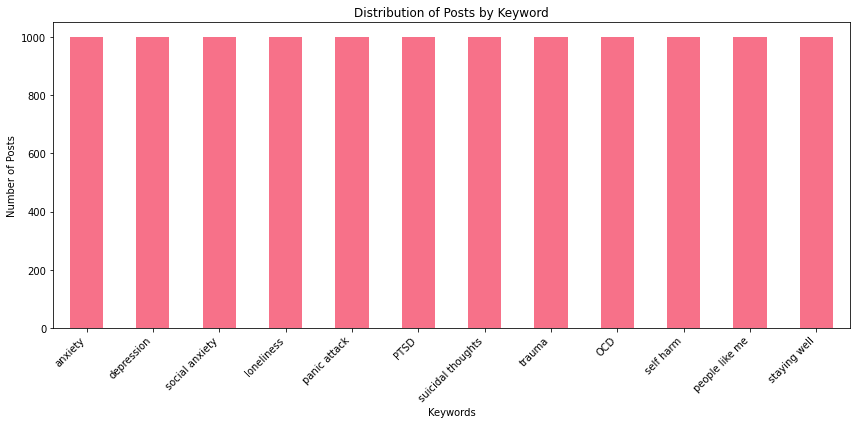


Total unique keywords: 12
Most common keyword: anxiety (1000 posts)


In [ ]:
# Analyse keywords distribution
print("=== KEYWORD ANALYSIS ===")
keyword_counts = df['keyword'].value_counts()
print("Keyword distribution:")
print(keyword_counts)

# Plot keyword distribution
plt.figure(figsize=(12, 6))
keyword_counts.plot(kind='bar')
plt.title('Distribution of Posts by Keyword')
plt.xlabel('Keywords')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Keyword statistics
print(f"\nTotal unique keywords: {df['keyword'].nunique()}")
print(f"Most common keyword: {keyword_counts.index[0]} ({keyword_counts.iloc[0]} posts)"s

=== TEXT QUALITY ANALYSIS ===
        text_length   word_count  sentence_count  avg_word_length  \
count  12000.000000  12000.00000    12000.000000     12000.000000   
mean    5310.701083   1015.52925       58.383167         4.248485   
std     3557.348824    683.69346       39.697114         0.176250   
min      146.000000     29.00000        1.000000         3.255814   
25%     2578.750000    487.75000       27.000000         4.133999   
50%     4475.500000    854.00000       49.000000         4.237650   
75%     7243.250000   1388.00000       80.000000         4.350620   
max    22749.000000   4329.00000      338.000000         6.355263   

       unique_words  lexical_diversity  
count  12000.000000       12000.000000  
mean     411.058333           0.460742  
std      207.643630           0.100173  
min       22.000000           0.243429  
25%      251.000000           0.388002  
50%      379.000000           0.445117  
75%      538.250000           0.517703  
max     1359.000000 

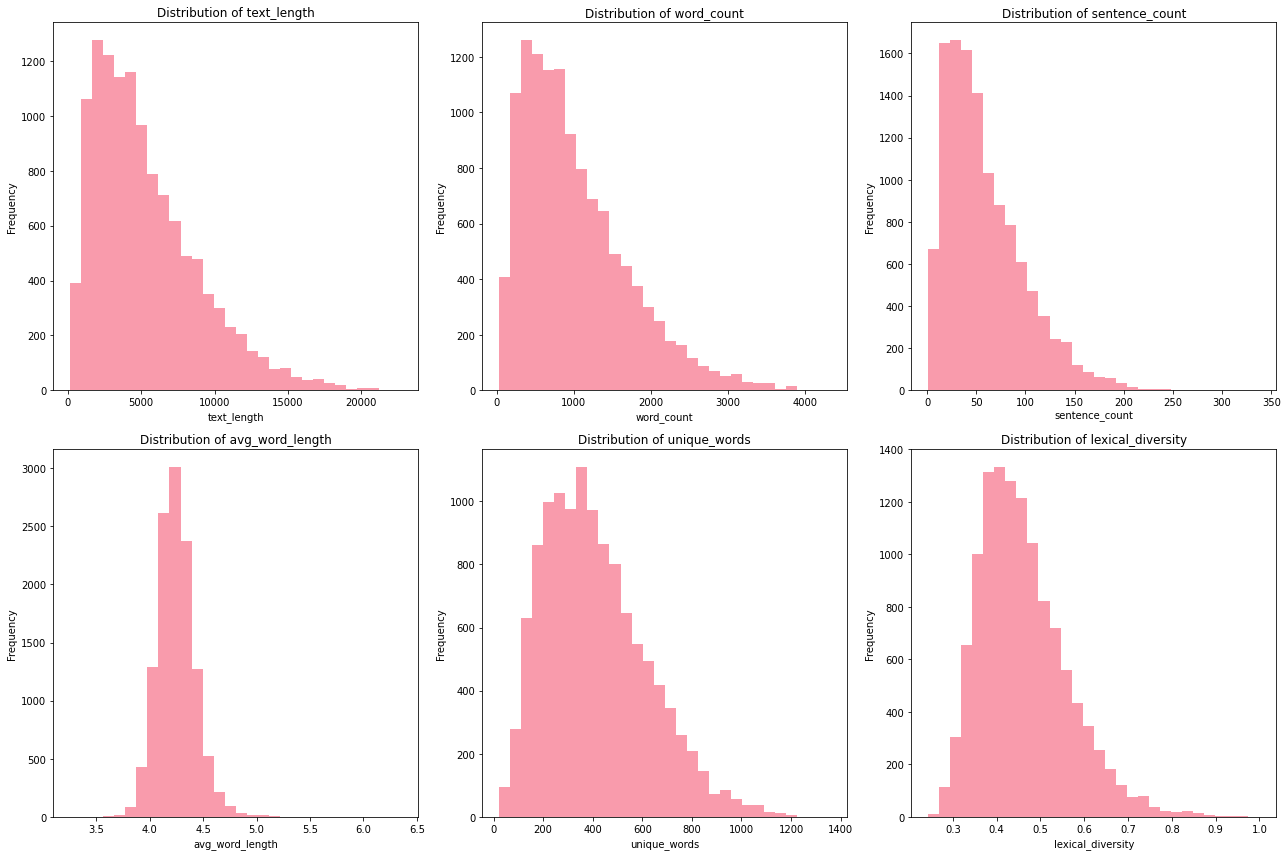

In [ ]:
# Analyse text quality metrics
print("=== TEXT QUALITY ANALYSIS ===")

# Calculate various text metrics
df['sentence_count'] = df['clean_text'].str.count(r'[.!?]+')
df['avg_word_length'] = df['clean_text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0)
df['unique_words'] = df['clean_text'].apply(lambda x: len(set(x.split())))
df['lexical_diversity'] = df['unique_words'] / df['word_count']

# Display text quality statistics
quality_metrics = ['text_length', 'word_count', 'sentence_count', 'avg_word_length', 'unique_words', 'lexical_diversity']
print(df[quality_metrics].describe())

# Plot text quality metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, metric in enumerate(quality_metrics):
    axes[i].hist(df[metric].dropna(), bins=30, alpha=0.7)
    axes[i].set_title(f'Distribution of {metric}')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

=== CONTENT ANALYSIS BY KEYWORD ===
                   text_length_mean  text_length_median  text_length_std  \
keyword                                                                    
OCD                         5055.19              4446.0          3128.14   
PTSD                        5225.40              4191.5          3875.95   
anxiety                     4531.23              3821.0          3044.89   
depression                  4965.60              4133.5          3507.85   
loneliness                  5777.46              5116.0          3601.60   
panic attack                4797.04              4127.5          3161.34   
people like me              5151.45              4300.5          3448.09   
self harm                   6257.23              5615.0          3795.04   
social anxiety              4699.75              3899.5          3158.92   
staying well                5626.15              4772.5          3698.80   
suicidal thoughts           5725.45              488

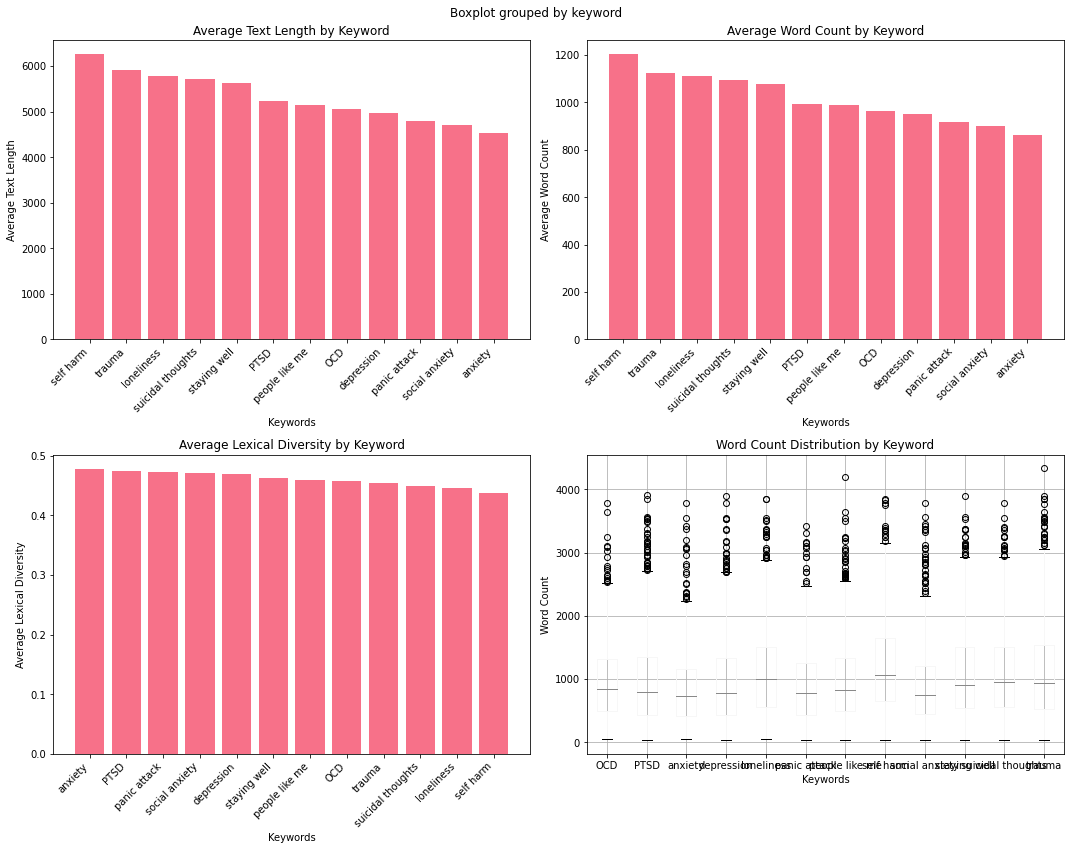

In [ ]:
# Analyse text characteristics by keyword
print("=== CONTENT ANALYSIS BY KEYWORD ===")

keyword_analysis = df.groupby('keyword').agg({
    'text_length': ['mean', 'median', 'std'],
    'word_count': ['mean', 'median', 'std'],
    'lexical_diversity': ['mean', 'median'],
    'clean_text': 'count'
}).round(2)

keyword_analysis.columns = ['_'.join(col) for col in keyword_analysis.columns]
keyword_analysis = keyword_analysis.rename(columns={'clean_text_count': 'post_count'})
print(keyword_analysis)

# Visualise differences between keywords
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Average text length by keyword
keyword_text_len = df.groupby('keyword')['text_length'].mean().sort_values(ascending=False)
axes[0,0].bar(range(len(keyword_text_len)), keyword_text_len.values)
axes[0,0].set_title('Average Text Length by Keyword')
axes[0,0].set_xlabel('Keywords')
axes[0,0].set_ylabel('Average Text Length')
axes[0,0].set_xticks(range(len(keyword_text_len)))
axes[0,0].set_xticklabels(keyword_text_len.index, rotation=45, ha='right')

# Average word count by keyword
keyword_word_count = df.groupby('keyword')['word_count'].mean().sort_values(ascending=False)
axes[0,1].bar(range(len(keyword_word_count)), keyword_word_count.values)
axes[0,1].set_title('Average Word Count by Keyword')
axes[0,1].set_xlabel('Keywords')
axes[0,1].set_ylabel('Average Word Count')
axes[0,1].set_xticks(range(len(keyword_word_count)))
axes[0,1].set_xticklabels(keyword_word_count.index, rotation=45, ha='right')

# Lexical diversity by keyword
keyword_diversity = df.groupby('keyword')['lexical_diversity'].mean().sort_values(ascending=False)
axes[1,0].bar(range(len(keyword_diversity)), keyword_diversity.values)
axes[1,0].set_title('Average Lexical Diversity by Keyword')
axes[1,0].set_xlabel('Keywords')
axes[1,0].set_ylabel('Average Lexical Diversity')
axes[1,0].set_xticks(range(len(keyword_diversity)))
axes[1,0].set_xticklabels(keyword_diversity.index, rotation=45, ha='right')

# Box plot of word counts by keyword
df.boxplot(column='word_count', by='keyword', ax=axes[1,1])
axes[1,1].set_title('Word Count Distribution by Keyword')
axes[1,1].set_xlabel('Keywords')
axes[1,1].set_ylabel('Word Count')

plt.tight_layout()
plt.show()

=== CORRELATION ANALYSIS ===


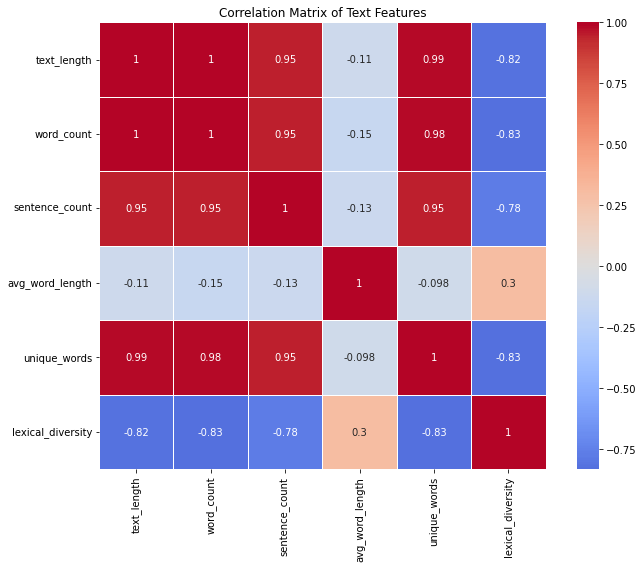

Correlation matrix:
                   text_length  word_count  sentence_count  avg_word_length  \
text_length              1.000       0.999           0.950           -0.114   
word_count               0.999       1.000           0.950           -0.152   
sentence_count           0.950       0.950           1.000           -0.126   
avg_word_length         -0.114      -0.152          -0.126            1.000   
unique_words             0.985       0.982           0.949           -0.098   
lexical_diversity       -0.824      -0.830          -0.777            0.299   

                   unique_words  lexical_diversity  
text_length               0.985             -0.824  
word_count                0.982             -0.830  
sentence_count            0.949             -0.777  
avg_word_length          -0.098              0.299  
unique_words              1.000             -0.831  
lexical_diversity        -0.831              1.000  


In [9]:
# Correlation analysis of numerical features
print("=== CORRELATION ANALYSIS ===")

numerical_cols = ['text_length', 'word_count', 'sentence_count', 'avg_word_length', 'unique_words', 'lexical_diversity']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Text Features')
plt.tight_layout()
plt.show()

print("Correlation matrix:")
print(correlation_matrix.round(3))

In [10]:
# Assess data quality
print("=== DATA QUALITY ASSESSMENT ===")

# Check for very short posts
short_posts = df[df['word_count'] < 5]
print(f"Posts with less than 5 words: {len(short_posts)} ({len(short_posts)/len(df)*100:.2f}%)")

# Check for very long posts
long_posts = df[df['word_count'] > 1000]
print(f"Posts with more than 1000 words: {len(long_posts)} ({len(long_posts)/len(df)*100:.2f}%)")

# Check for duplicate content
duplicates = df.duplicated(subset=['clean_text']).sum()
print(f"Duplicate posts: {duplicates} ({duplicates/len(df)*100:.2f}%)")

# Check for empty posts
empty_posts = df[df['clean_text'].str.strip() == ''].shape[0]
print(f"Empty posts after cleaning: {empty_posts}")

# Summary statistics
print(f"\nDataset summary:")
print(f"Total posts: {len(df)}")
print(f"Average post length: {df['word_count'].mean():.2f} words")
print(f"Median post length: {df['word_count'].median():.2f} words")
print(f"Date range: {df['post_date'].min()} to {df['post_date'].max()}" if 'post_date' in df.columns else "No date information")

=== DATA QUALITY ASSESSMENT ===
Posts with less than 5 words: 0 (0.00%)
Posts with more than 1000 words: 5032 (41.93%)
Duplicate posts: 1024 (8.53%)
Empty posts after cleaning: 0

Dataset summary:
Total posts: 12000
Average post length: 1015.53 words
Median post length: 854.00 words
Date range: NaT to NaT


In [11]:
# Assess data quality
print("=== DATA QUALITY ASSESSMENT ===")

# Check for very short posts
short_posts = df[df['word_count'] < 5]
print(f"Posts with less than 5 words: {len(short_posts)} ({len(short_posts)/len(df)*100:.2f}%)")

# Check for very long posts
long_posts = df[df['word_count'] > 1000]
print(f"Posts with more than 1000 words: {len(long_posts)} ({len(long_posts)/len(df)*100:.2f}%)")

# Check for duplicate content
duplicates = df.duplicated(subset=['clean_text']).sum()
print(f"Duplicate posts: {duplicates} ({duplicates/len(df)*100:.2f}%)")

# Check for empty posts
empty_posts = df[df['clean_text'].str.strip() == ''].shape[0]
print(f"Empty posts after cleaning: {empty_posts}")

# Summary statistics
print(f"\nDataset summary:")
print(f"Total posts: {len(df)}")
print(f"Average post length: {df['word_count'].mean():.2f} words")
print(f"Median post length: {df['word_count'].median():.2f} words")
print(f"Date range: {df['post_date'].min()} to {df['post_date'].max()}" if 'post_date' in df.columns else "No date information")

=== DATA QUALITY ASSESSMENT ===
Posts with less than 5 words: 0 (0.00%)
Posts with more than 1000 words: 5032 (41.93%)
Duplicate posts: 1024 (8.53%)
Empty posts after cleaning: 0

Dataset summary:
Total posts: 12000
Average post length: 1015.53 words
Median post length: 854.00 words
Date range: NaT to NaT


In [12]:
# Mental Health Words Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from wordcloud import WordCloud

# Define comprehensive mental health vocabulary
mental_health_words = {
    'emotions': ['anxiety', 'anxious', 'worried', 'worry', 'depression', 'depressed', 'sad', 'sadness', 
                'happy', 'happiness', 'angry', 'anger', 'fear', 'fearful', 'scared', 'panic', 'mood',
                'emotional', 'emotions', 'feeling', 'feelings', 'upset', 'overwhelmed', 'stressed',
                'stress', 'frustrated', 'frustration', 'hopeless', 'hopeful', 'lonely', 'loneliness'],
    
    'mental_conditions': ['bipolar', 'ptsd', 'ocd', 'adhd', 'autism', 'schizophrenia', 'psychosis',
                         'mania', 'manic', 'paranoia', 'paranoid', 'disorder', 'illness', 'mental',
                         'psychological', 'psychiatric', 'diagnosis', 'diagnosed', 'condition'],
    
    'symptoms': ['insomnia', 'sleepless', 'nightmares', 'hallucinations', 'delusions', 'racing',
                'thoughts', 'concentration', 'focus', 'memory', 'appetite', 'fatigue', 'tired',
                'exhausted', 'restless', 'agitated', 'irritable', 'crying', 'tears', 'worthless',
                'guilty', 'shame', 'suicidal', 'suicide', 'self-harm', 'cutting', 'hurt'],
    
    'treatment': ['therapy', 'therapist', 'counseling', 'counselor', 'psychologist', 'psychiatrist',
                 'medication', 'antidepressant', 'antianxiety', 'treatment', 'recovery', 'healing',
                 'help', 'support', 'coping', 'mindfulness', 'meditation', 'exercise', 'hospital',
                 'clinic', 'doctor', 'gp', 'prescription', 'dosage'],
    
    'social_support': ['family', 'friends', 'partner', 'relationship', 'relationships', 'social',
                      'isolation', 'isolated', 'alone', 'support', 'understanding', 'love',
                      'care', 'caring', 'empathy', 'community', 'group', 'forum', 'talk',
                      'listen', 'share', 'sharing', 'connect', 'connection'],
    
    'coping_strategies': ['breathing', 'relaxation', 'yoga', 'music', 'art', 'writing', 'journal',
                         'walk', 'walking', 'nature', 'outdoors', 'routine', 'schedule', 'goals',
                         'positive', 'negative', 'thoughts', 'thinking', 'mindset', 'attitude',
                         'hope', 'strength', 'resilience', 'courage', 'brave', 'recovery']
}

# Flatten all mental health words
all_mh_words = []
for category, words in mental_health_words.items():
    all_mh_words.extend(words)

print("=== MENTAL HEALTH WORDS ANALYSIS ===")
print(f"Total mental health vocabulary: {len(all_mh_words)} words")

=== MENTAL HEALTH WORDS ANALYSIS ===
Total mental health vocabulary: 151 words



=== MENTAL HEALTH WORDS BY CATEGORY ===


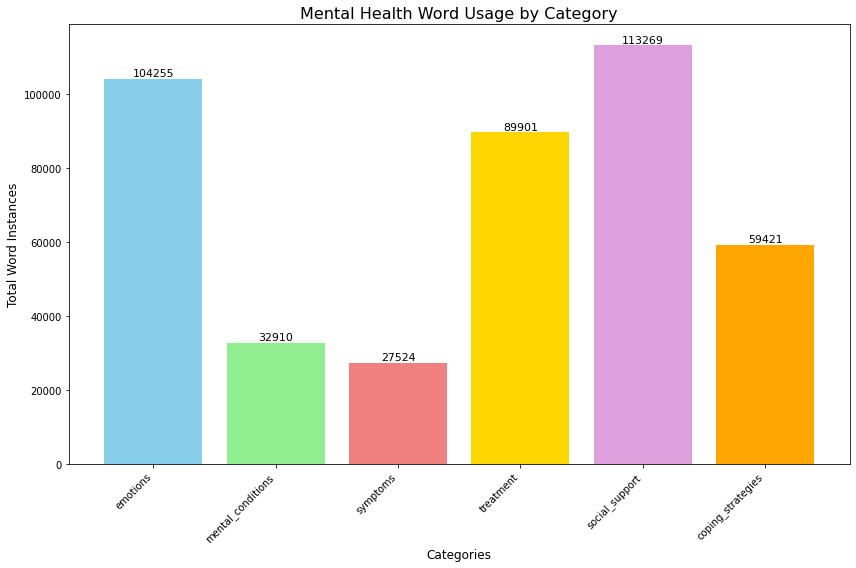


EMOTIONS:
  Total instances: 104255
  Unique words: 31
  Top 5 words: anxiety(23961), feeling(16931), depression(11319), feelings(5982), panic(5783)

MENTAL CONDITIONS:
  Total instances: 32910
  Unique words: 19
  Top 5 words: mental(12268), ocd(4967), ptsd(3370), diagnosed(2786), illness(2585)

SYMPTOMS:
  Total instances: 27524
  Unique words: 27
  Top 5 words: thoughts(11678), focus(2544), hurt(2173), suicide(2022), suicidal(1765)

TREATMENT:
  Total instances: 89901
  Unique words: 24
  Top 5 words: help(28517), support(14770), gp(8360), psychologist(6860), medication(4933)

SOCIAL SUPPORT:
  Total instances: 113269
  Unique words: 24
  Top 5 words: support(14770), talk(14027), love(10033), family(9012), friends(7989)

COPING STRATEGIES:
  Total instances: 59421
  Unique words: 26
  Top 5 words: hope(18373), thoughts(11678), thinking(5242), positive(3406), negative(2274)


In [14]:
# Mental health words by category
print("\n=== MENTAL HEALTH WORDS BY CATEGORY ===")

category_stats = {}
for category, words in mental_health_words.items():
    category_words_found = []
    for word_list in df['mh_words']:
        category_words_found.extend([w for w in word_list if w in words])
    
    category_freq = Counter(category_words_found)
    category_stats[category] = {
        'total_instances': len(category_words_found),
        'unique_words': len(category_freq),
        'top_words': category_freq.most_common(10)
    }

# Plot category distribution
categories = list(category_stats.keys())
total_instances = [category_stats[cat]['total_instances'] for cat in categories]

plt.figure(figsize=(12, 8))
bars = plt.bar(categories, total_instances, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum', 'orange'])
plt.title('Mental Health Word Usage by Category', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Total Word Instances', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add frequency labels on bars
for bar, freq in zip(bars, total_instances):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(freq), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# Print detailed category analysis
for category, stats in category_stats.items():
    print(f"\n{category.upper().replace('_', ' ')}:")
    print(f"  Total instances: {stats['total_instances']}")
    print(f"  Unique words: {stats['unique_words']}")
    print(f"  Top 5 words: {', '.join([f'{word}({freq})' for word, freq in stats['top_words'][:5]])}")

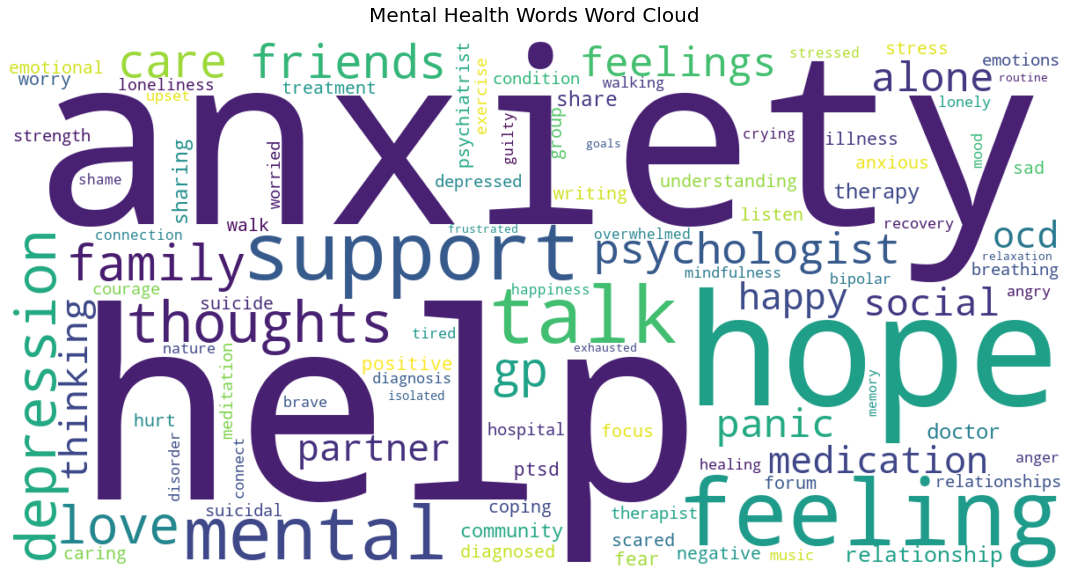

Word cloud saved as 'mental_health_wordcloud.png'


<Figure size 432x288 with 0 Axes>

In [25]:
# Create Mental Health Word Cloud
if len(all_mh_words_found) > 0:
    # Create word frequency dictionary for word cloud
    wordcloud_dict = dict(mh_word_freq.most_common(100))
    
    # Generate word cloud
    wordcloud = WordCloud(width=1200, height=600, 
                         background_color='white',
                         colormap='viridis',
                         max_words=100,
                         relative_scaling=0.5,
                         random_state=42).generate_from_frequencies(wordcloud_dict)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Mental Health Words Word Cloud', fontsize=20, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Save the word cloud
    plt.savefig('mental_health_wordcloud.png', dpi=300, bbox_inches='tight')
    print("Word cloud saved as 'mental_health_wordcloud.png'")
else:
    print("No mental health words found in the dataset")

=== WORD CLOUDS BY KEYWORD ===


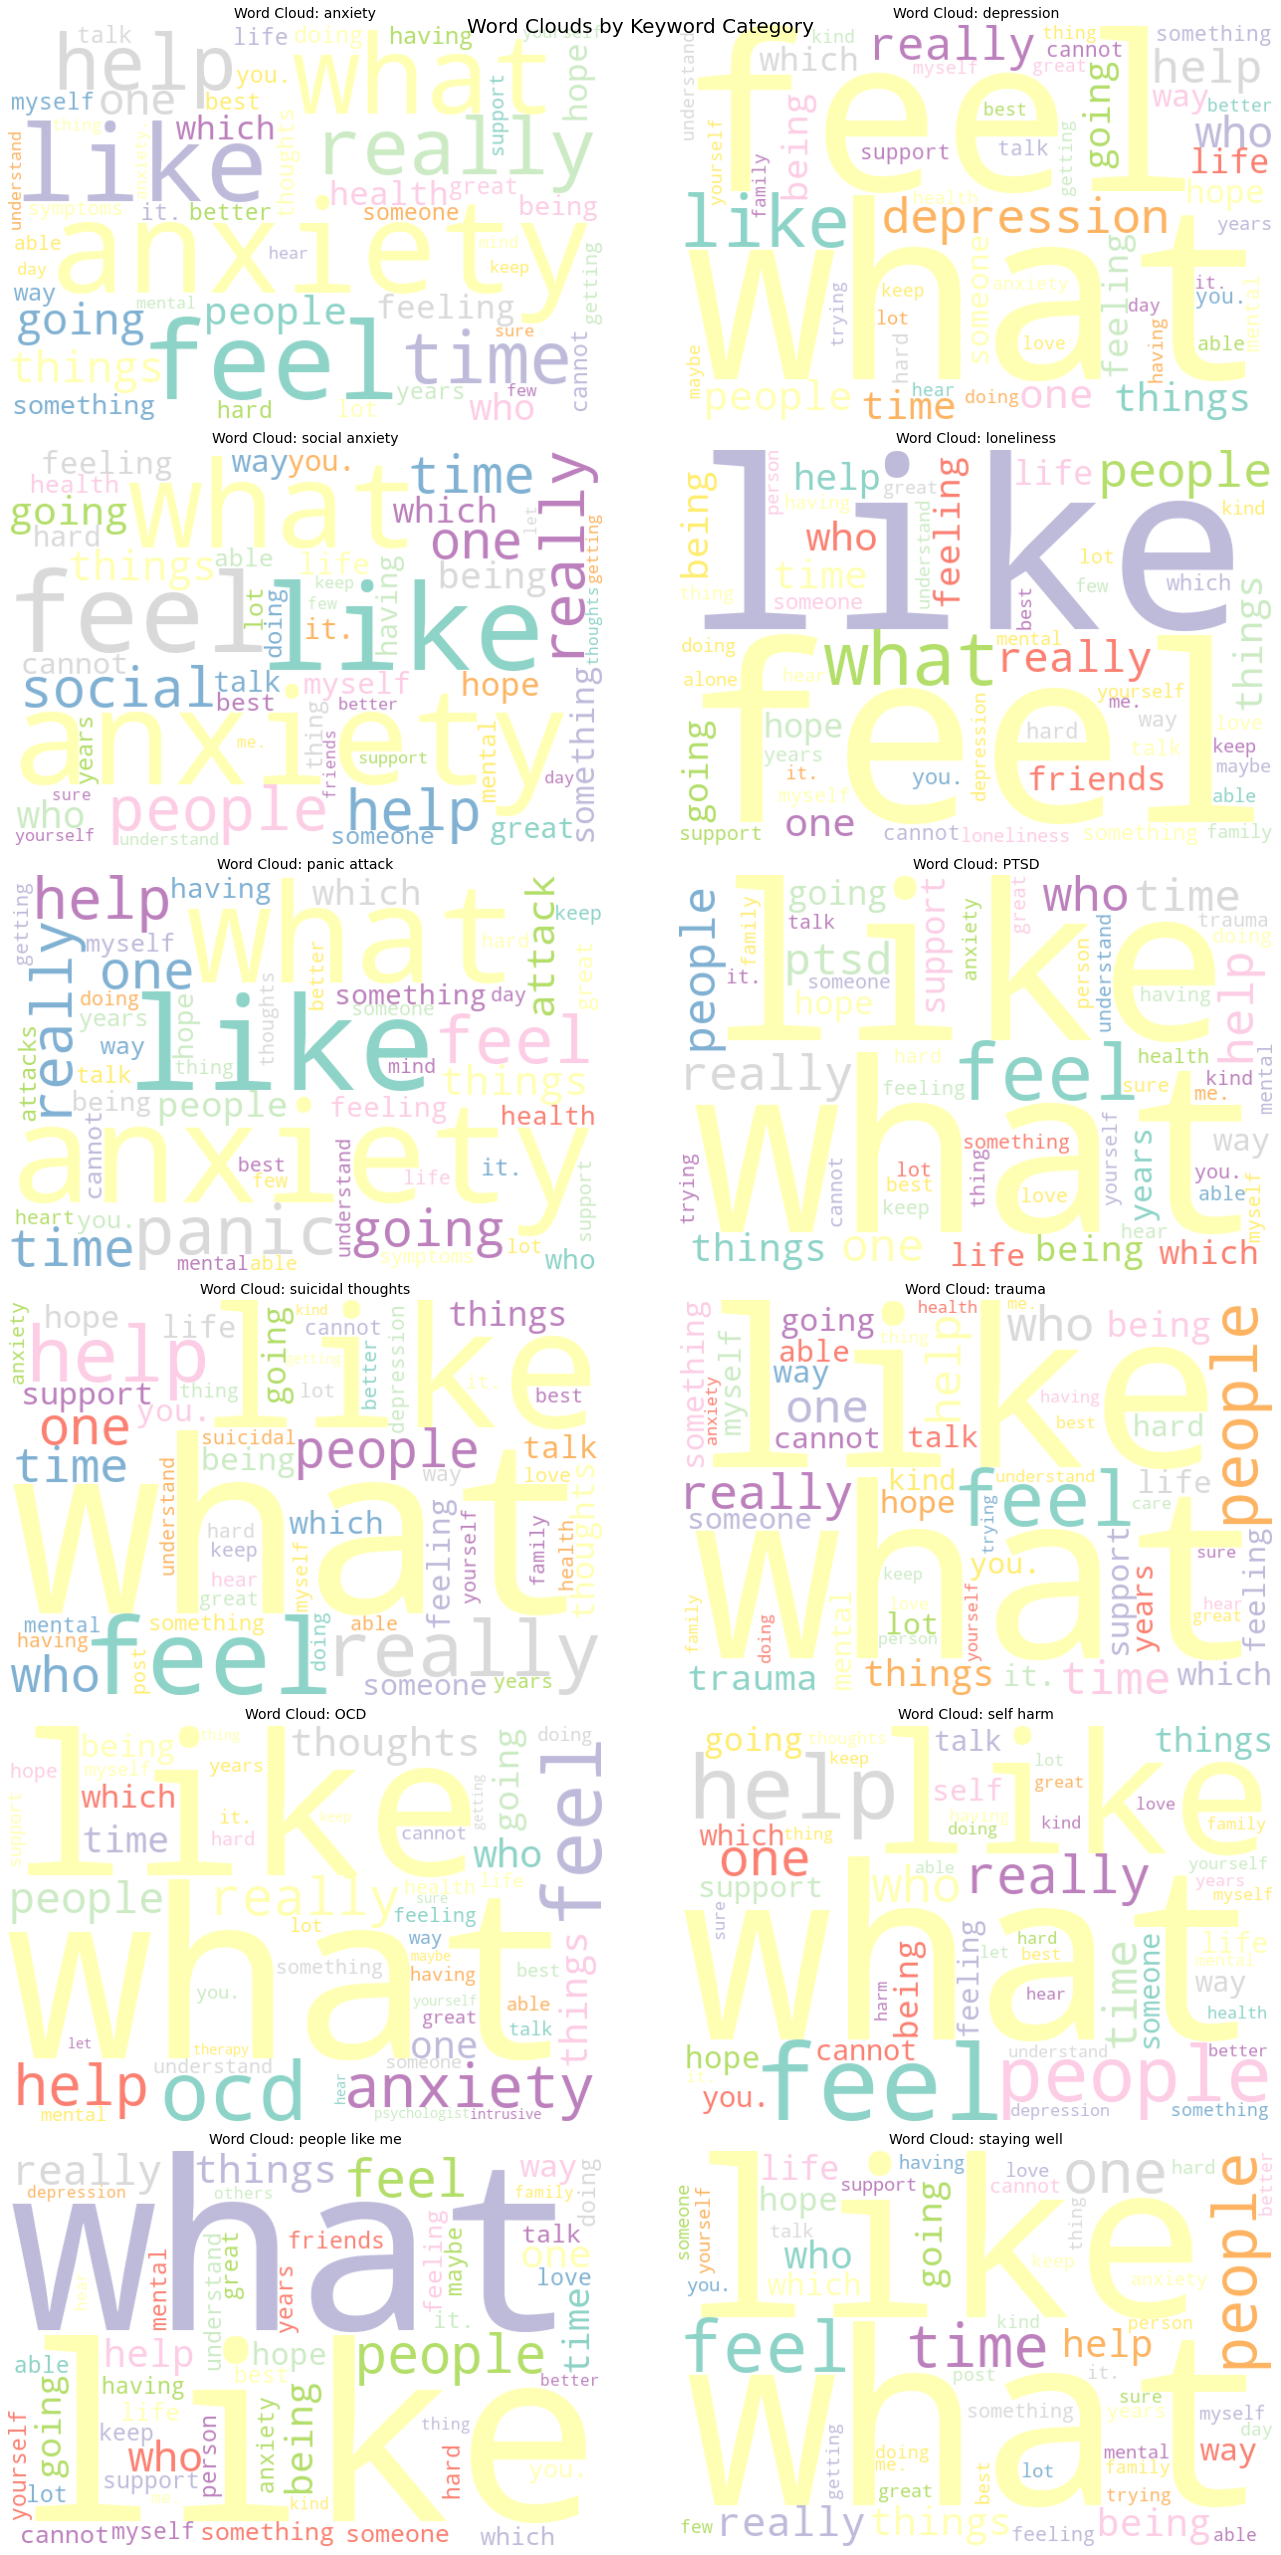

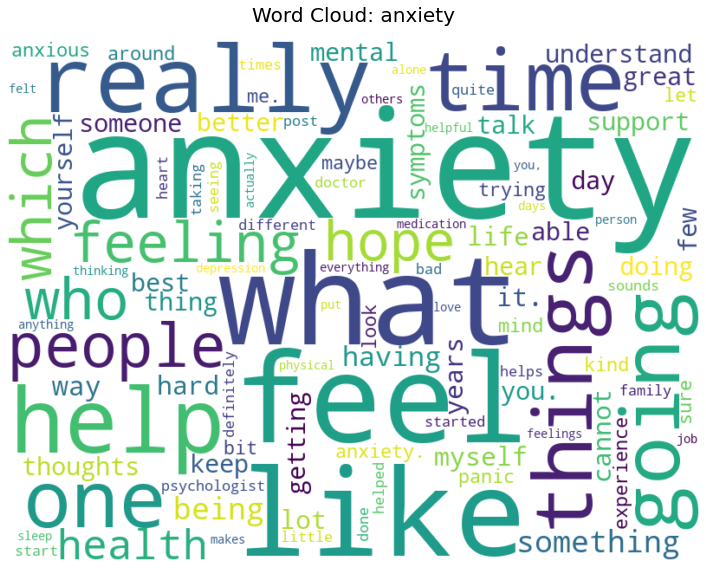

Word cloud for 'anxiety' saved as 'anxiety_wordcloud.png'


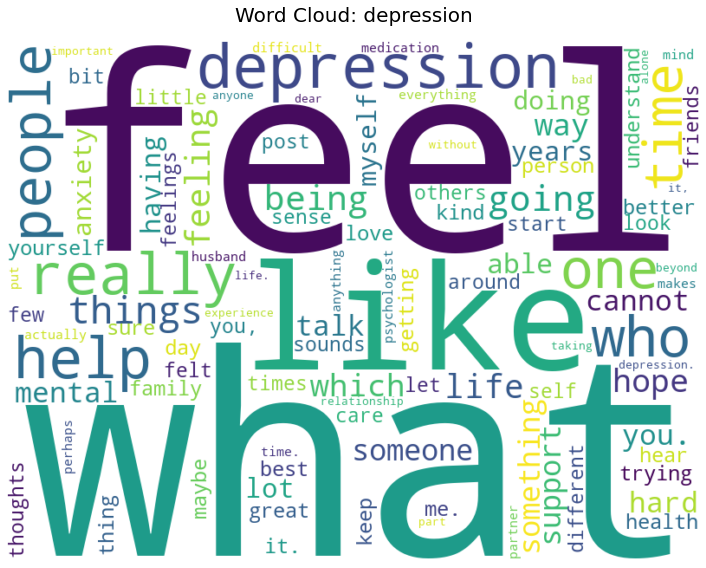

Word cloud for 'depression' saved as 'depression_wordcloud.png'


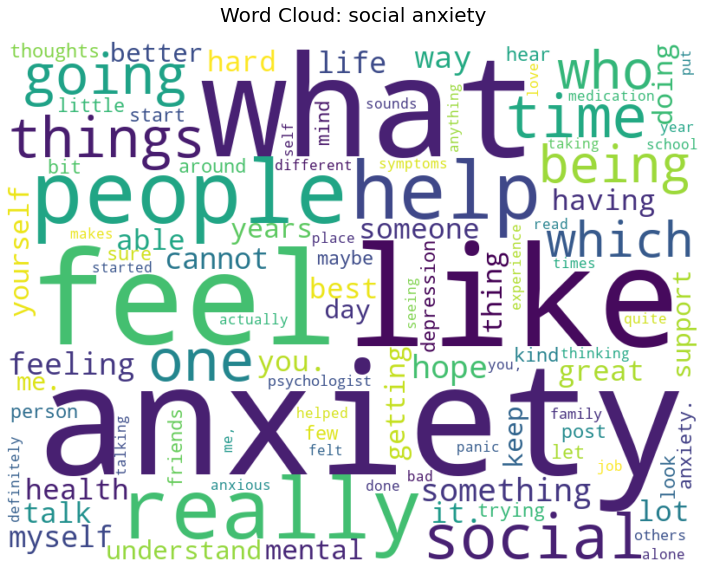

Word cloud for 'social anxiety' saved as 'social_anxiety_wordcloud.png'


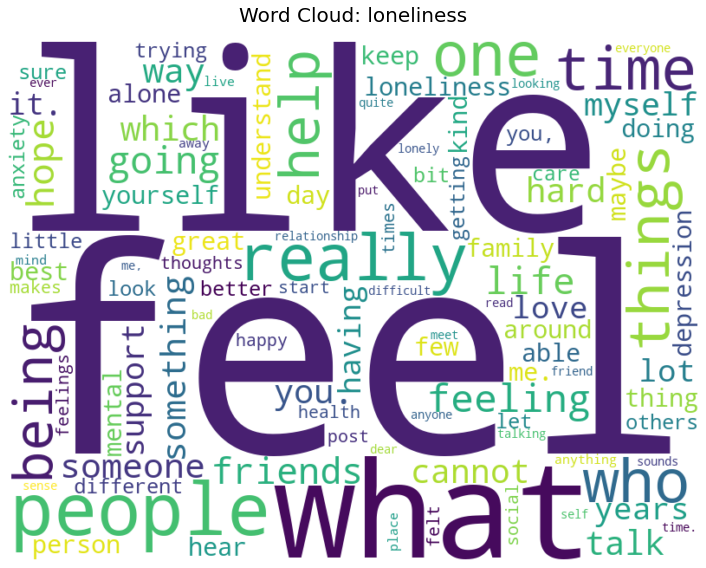

Word cloud for 'loneliness' saved as 'loneliness_wordcloud.png'


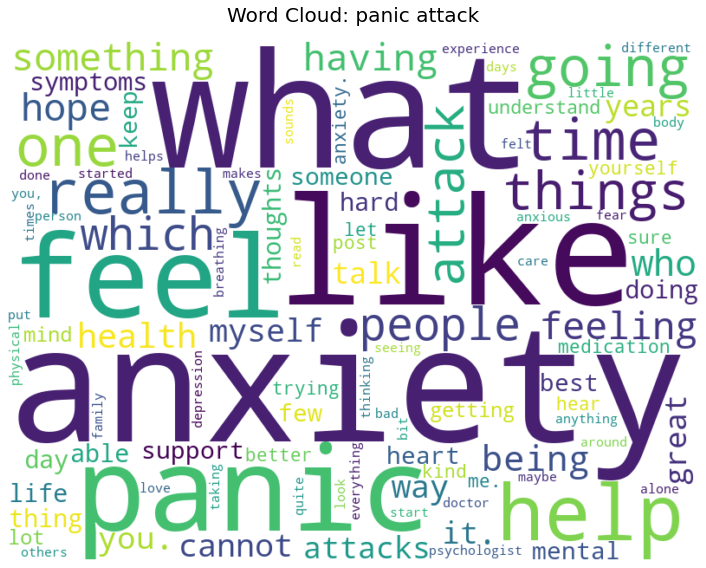

Word cloud for 'panic attack' saved as 'panic_attack_wordcloud.png'


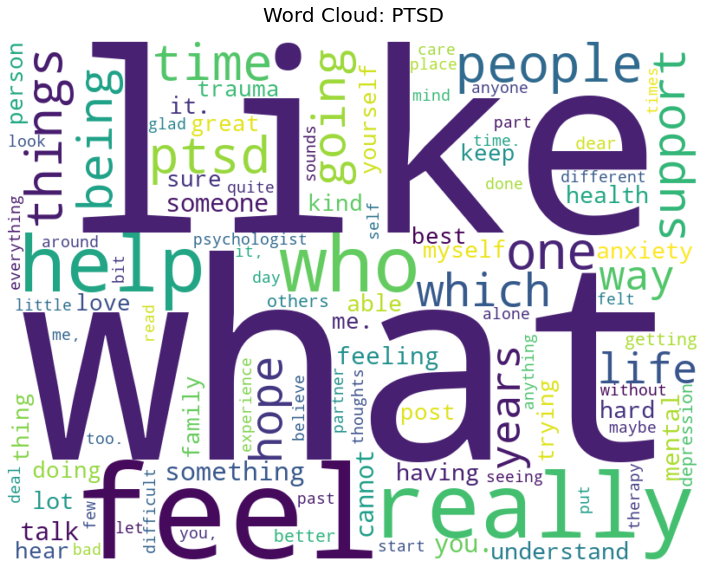

Word cloud for 'PTSD' saved as 'ptsd_wordcloud.png'


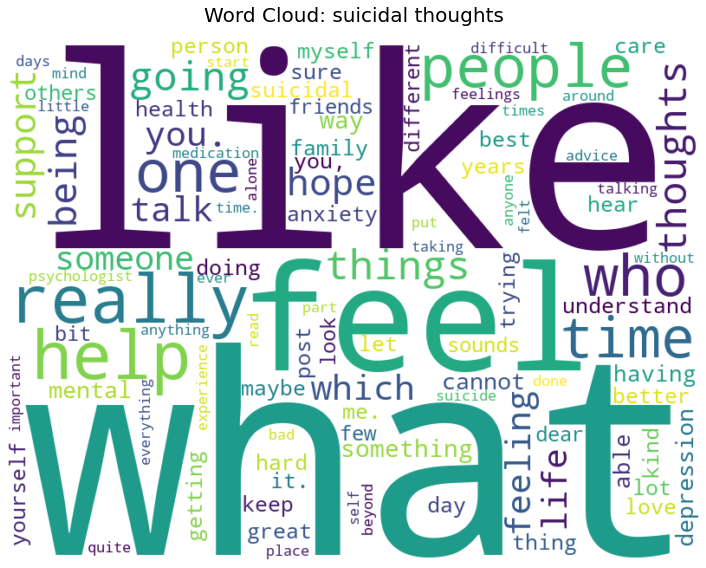

Word cloud for 'suicidal thoughts' saved as 'suicidal_thoughts_wordcloud.png'


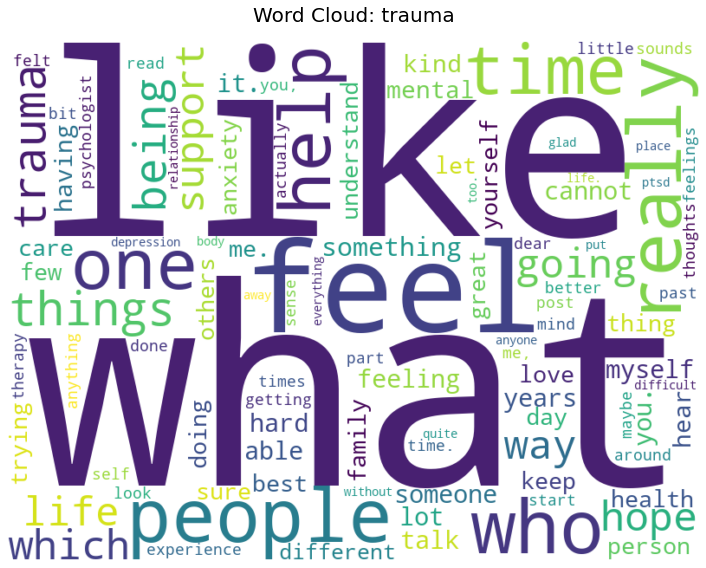

Word cloud for 'trauma' saved as 'trauma_wordcloud.png'


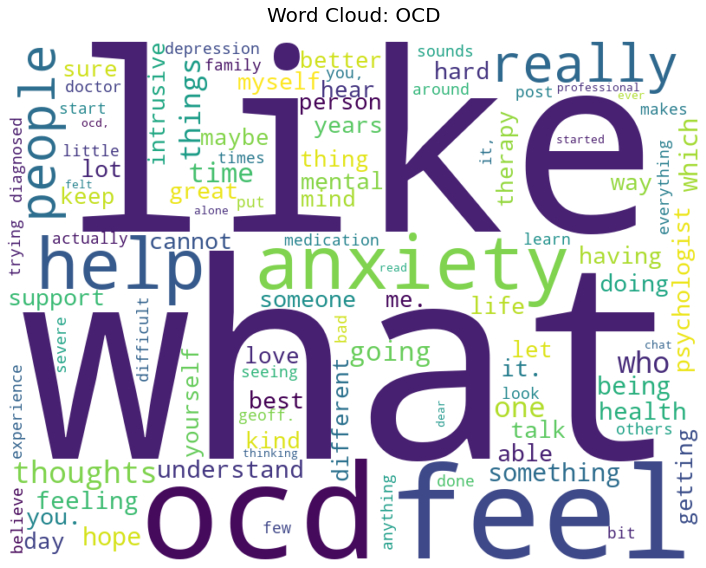

Word cloud for 'OCD' saved as 'ocd_wordcloud.png'


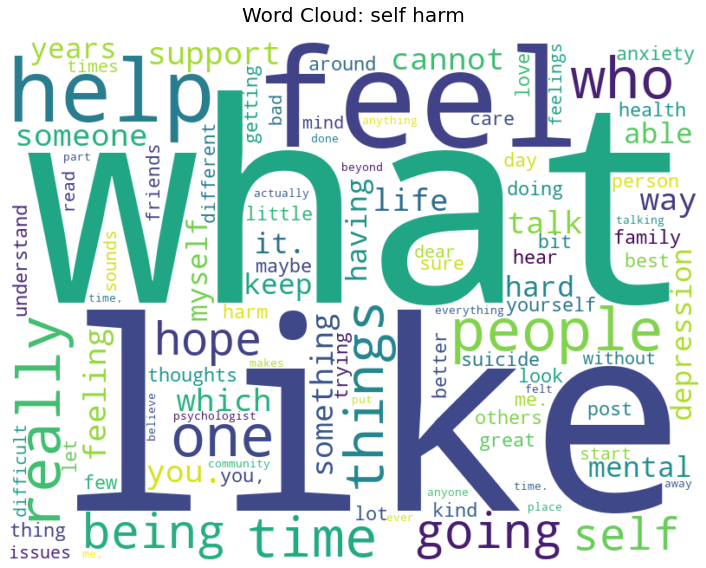

Word cloud for 'self harm' saved as 'self_harm_wordcloud.png'


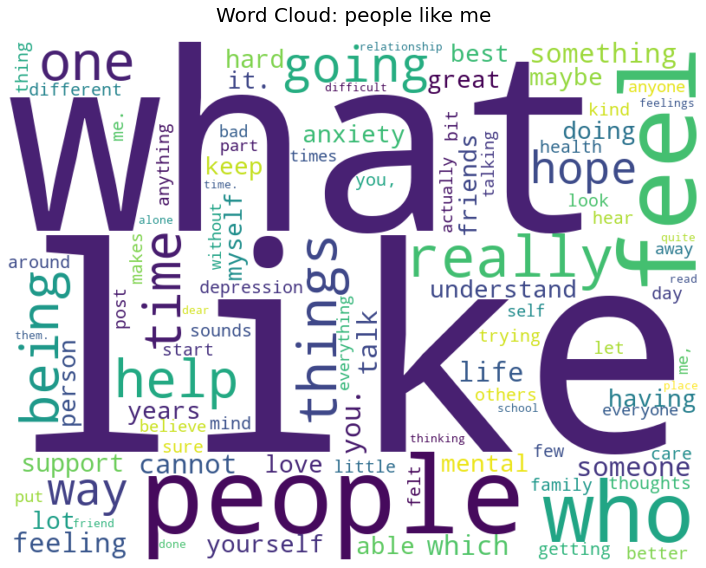

Word cloud for 'people like me' saved as 'people_like_me_wordcloud.png'


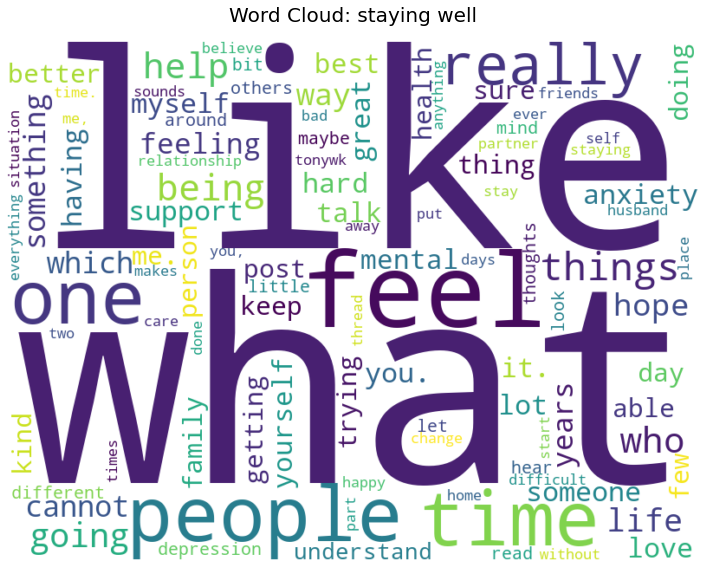

Word cloud for 'staying well' saved as 'staying_well_wordcloud.png'


In [27]:
# Create Word Clouds by Keyword
print("=== WORD CLOUDS BY KEYWORD ===")

# Get unique keywords
keywords = df['keyword'].unique()

# Create subplots for multiple word clouds
n_keywords = len(keywords)
cols = 2
rows = (n_keywords + 1) // 2

fig, axes = plt.subplots(rows, cols, figsize=(20, 6*rows))
if rows == 1:
    axes = axes.reshape(1, -1)

for i, keyword in enumerate(keywords):
    row = i // cols
    col = i % cols
    
    # Get text for this keyword
    keyword_df = df[df['keyword'] == keyword]
    keyword_text = ' '.join(keyword_df['clean_text'])
    
    # Create word frequency for this keyword
    keyword_words = keyword_text.split()
    keyword_word_freq = Counter(keyword_words)
    
    # Filter out stopwords
    filtered_keyword_freq = {word: freq for word, freq in keyword_word_freq.items() 
                           if word.lower() not in stopwords_custom and len(word) > 2}
    
    if filtered_keyword_freq:
        # Create word cloud for this keyword
        keyword_wordcloud = WordCloud(width=600, height=400,
                                     background_color='white',
                                     colormap='Set3',
                                     max_words=50,
                                     relative_scaling=0.5,
                                     random_state=42).generate_from_frequencies(filtered_keyword_freq)
        
        axes[row, col].imshow(keyword_wordcloud, interpolation='bilinear')
        axes[row, col].axis('off')
        axes[row, col].set_title(f'Word Cloud: {keyword}', fontsize=14)
    else:
        axes[row, col].text(0.5, 0.5, f'No words found\nfor {keyword}', 
                           ha='center', va='center', fontsize=12)
        axes[row, col].axis('off')

# Hide empty subplots if any
for i in range(n_keywords, rows * cols):
    row = i // cols
    col = i % cols
    axes[row, col].axis('off')

plt.suptitle('Word Clouds by Keyword Category', fontsize=20, y=0.98)
plt.tight_layout()
plt.show()

# Save individual keyword word clouds
for keyword in keywords:
    keyword_df = df[df['keyword'] == keyword]
    keyword_text = ' '.join(keyword_df['clean_text'])
    keyword_words = keyword_text.split()
    keyword_word_freq = Counter(keyword_words)
    
    filtered_keyword_freq = {word: freq for word, freq in keyword_word_freq.items() 
                           if word.lower() not in stopwords_custom and len(word) > 2}
    
    if filtered_keyword_freq:
        keyword_wordcloud = WordCloud(width=800, height=600,
                                     background_color='white',
                                     colormap='viridis',
                                     max_words=100,
                                     relative_scaling=0.5,
                                     random_state=42).generate_from_frequencies(filtered_keyword_freq)
        
        plt.figure(figsize=(12, 8))
        plt.imshow(keyword_wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud: {keyword}', fontsize=20, pad=20)
        plt.tight_layout()
        
        # Save individual word cloud
        filename = f'{keyword.lower().replace(" ", "_")}_wordcloud.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Word cloud for '{keyword}' saved as '{filename}'")

In [4]:
import pandas as pd
import spacy
from nltk.corpus import stopwords

# 1. Load your cleaned data
df = pd.read_csv('data/bb_posts_cleaned.csv', parse_dates=False)

# 2. (Re-)parse the post_date into a datetime, if you need it
#   — only if 'post_date' is still present and you want to keep time info
df['post_date'] = pd.to_datetime(df['post_date'].str.replace('\u200e',''),
                                 dayfirst=True, errors='coerce')

# 3. Initialize SpaCy and stopword list
nlp = spacy.load("en_core_web_sm", disable=["parser","ner"])
stop_words = set(stopwords.words("english"))

# 4. Tokenization + lemmatization function
def tokenize(text: str):
    doc = nlp(text)
    tokens = []
    for tok in doc:
        # keep only alphabetic lemmas that aren’t stopwords
        if tok.is_alpha and tok.lemma_ not in stop_words:
            tokens.append(tok.lemma_)
    return tokens

# 5. Apply to your clean_text
df['tokens'] = df['clean_text'].apply(tokenize)

# 6. Drop any rows that ended up with zero tokens
df = df[df['tokens'].map(len) > 0].reset_index(drop=True)

# 7. (Optional) Quick sanity check
print(df[['clean_text','tokens']].head())

# 8. Save tokenized data for the next stage
df.to_csv('data/bb_posts_tokenized.csv', index=False)
print("Tokenized data saved to 'data/bb_posts_tokenized.csv'")


                                          clean_text  \
0  hi my name is michelle and i have had anxiety ...   
1  hi, i have suffered on and off from anxiety ov...   
2  i have had chronic anxiety since 2016, but i h...   
3  hello i struggle with very bad anxiety and pan...   
4  i have recently sold my mortgage free home tha...   

                                              tokens  
0  [hi, name, michelle, I, anxiety, whole, life, ...  
1  [hi, I, suffer, anxiety, life, recent, year, r...  
2  [I, chronic, anxiety, since, I, always, manage...  
3  [hello, I, struggle, bad, anxiety, panic, atta...  
4  [I, recently, sell, mortgage, free, home, I, l...  
Tokenized data saved to 'data/bb_posts_tokenized.csv'


In [9]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 1. Load tokenized Beyond Blue data
df = pd.read_csv('data/bb_posts_tokenized.csv')
df['tokens'] = df['tokens'].apply(ast.literal_eval)

# 2. Reconstruct each post as a single string
df['document'] = df['tokens'].apply(lambda t: " ".join(t))

# 3. Function to run TF-IDF + LDA per keyword
def topic_model_by_keyword(data, keyword, n_topics=4):
    subset = data[data['keyword'] == keyword]
    docs = subset['document'].tolist()
    if len(docs) < n_topics:
        print(f"Skipping '{keyword}' (only {len(docs)} documents).")
        return None

    # TF-IDF vectorization (unigrams+bigrams)
    tfidf = TfidfVectorizer(
        max_df=0.85,
        min_df=5,
        ngram_range=(1, 2),
        stop_words='english'
    )
    X = tfidf.fit_transform(docs)

    # LDA fitting
    lda = LatentDirichletAllocation(
        n_components=n_topics,
        learning_method='batch',
        random_state=42
    )
    doc_topic = lda.fit_transform(X)

    # Display top 6 terms for each topic
    terms = tfidf.get_feature_names_out()
    print(f"\nTopics for '{keyword}':")
    for i, comp in enumerate(lda.components_):
        top_terms = [terms[idx] for idx in comp.argsort()[:-7:-1]]
        print(f" Topic {i+1}: {', '.join(top_terms)}")

    # Attach topic distribution back to subset
    cols = [f"{keyword}_Topic{j+1}" for j in range(n_topics)]
    subset = subset.reset_index(drop=True)
    for j, col in enumerate(cols):
        subset[col] = doc_topic[:, j]
    return subset

# 4. Apply across all keywords and collect results
results = []
for kw in df['keyword'].unique():
    modeled = topic_model_by_keyword(df, kw, n_topics=4)
    if modeled is not None:
        results.append(modeled)

# 5. Combine and save
if results:
    df_topics = pd.concat(results, ignore_index=True)
    df_topics.to_csv('bb_posts_topic_modeled.csv', index=False)
    print("\nSaved topic-modeled data to 'bb_posts_topic_modeled.csv'")



Topics for 'anxiety':
 Topic 1: chatter, tire, deal life, notice feel, question feel, international
 Topic 2: chatter, tire, deal life, notice feel, question feel, international
 Topic 3: chatter, tire, deal life, notice feel, question feel, international
 Topic 4: time, know, thing, think, work, good

Topics for 'depression':
 Topic 1: know, thing, think, good, people, make
 Topic 2: depression helpful, start right, med work, depression care, tire, post depression
 Topic 3: depression helpful, start right, med work, depression care, tire, post depression
 Topic 4: depression helpful, start right, med work, depression care, tire, post depression

Topics for 'depression':
 Topic 1: know, thing, think, good, people, make
 Topic 2: depression helpful, start right, med work, depression care, tire, post depression
 Topic 3: depression helpful, start right, med work, depression care, tire, post depression
 Topic 4: depression helpful, start right, med work, depression care, tire, post depre

In [32]:
# === TRIGRAM AND QUADGRAM ANALYSIS ===
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

print("=== N-GRAM ANALYSIS (TRIGRAMS & QUADGRAMS) ===")

# Load tokenized data
try:
    df_tokens = pd.read_csv('data/bb_posts_tokenized.csv')
    print("Loaded tokenized data from CSV")
    
    # Convert string representation of lists back to actual lists
    if 'tokens' in df_tokens.columns:
        df_tokens['tokens'] = df_tokens['tokens'].apply(ast.literal_eval)
    else:
        print("No 'tokens' column found. Creating tokens from clean_text...")
        # If no tokens column, create from clean_text
        df_tokens['tokens'] = df_tokens['clean_text'].apply(lambda x: x.split() if pd.notna(x) else [])
    
except FileNotFoundError:
    print("Tokenized CSV not found. Using current dataframe...")
    df_tokens = df.copy()
    if 'tokens' not in df_tokens.columns:
        df_tokens['tokens'] = df_tokens['clean_text'].apply(lambda x: x.split() if pd.notna(x) else [])

print(f"Working with {len(df_tokens)} posts")
print(f"Sample tokens: {df_tokens['tokens'].iloc[0][:10] if len(df_tokens) > 0 else 'No data'}")

# Remove posts with insufficient tokens for n-grams
df_tokens = df_tokens[df_tokens['tokens'].apply(len) >= 4].reset_index(drop=True)
print(f"Posts with at least 4 tokens: {len(df_tokens)}")

if len(df_tokens) > 0:
    # Function to extract n-grams from token list
    def extract_ngrams(tokens, n):
        """Extract n-grams from a list of tokens"""
        if len(tokens) < n:
            return []
        ngrams = []
        for i in range(len(tokens) - n + 1):
            ngram = ' '.join(tokens[i:i+n])
            ngrams.append(ngram)
        return ngrams
    
    # Extract trigrams (3-grams)
    print("\n=== TRIGRAM EXTRACTION ===")
    all_trigrams = []
    df_tokens['trigrams'] = df_tokens['tokens'].apply(lambda x: extract_ngrams(x, 3))
    
    for trigram_list in df_tokens['trigrams']:
        all_trigrams.extend(trigram_list)
    
    trigram_freq = Counter(all_trigrams)
    print(f"Total trigrams extracted: {len(all_trigrams)}")
    print(f"Unique trigrams: {len(trigram_freq)}")
    
    # Extract quadgrams (4-grams)
    print("\n=== QUADGRAM EXTRACTION ===")
    all_quadgrams = []
    df_tokens['quadgrams'] = df_tokens['tokens'].apply(lambda x: extract_ngrams(x, 4))
    
    for quadgram_list in df_tokens['quadgrams']:
        all_quadgrams.extend(quadgram_list)
    
    quadgram_freq = Counter(all_quadgrams)
    print(f"Total quadgrams extracted: {len(all_quadgrams)}")
    print(f"Unique quadgrams: {len(quadgram_freq)}")
else:
    print("Insufficient data for n-gram analysis")

=== N-GRAM ANALYSIS (TRIGRAMS & QUADGRAMS) ===
Loaded tokenized data from CSV
Working with 12000 posts
Sample tokens: ['hi', 'name', 'michelle', 'I', 'anxiety', 'whole', 'life', 'usually', 'I', 'able']
Posts with at least 4 tokens: 12000

=== TRIGRAM EXTRACTION ===
Total trigrams extracted: 5825165
Unique trigrams: 3105529

=== QUADGRAM EXTRACTION ===
Total quadgrams extracted: 5813165
Unique quadgrams: 3967718



=== TOP TRIGRAMS ANALYSIS ===
Top 20 Trigrams:
 1. I think I                      : 4688
 2. I feel like                    : 4383
 3. I know I                       : 4126
 4. feel like I                    : 3459
 5. I would like                   : 2100
 6. I feel I                       : 1965
 7. I sorry hear                   : 1891
 8. make I feel                    : 1772
 9. I say I                        : 1307
10. year ago I                     : 1282
11. I hope help                    : 1245
12. welcome forum I                : 1185
13. I guess I                      : 1167
14. I wish I                       : 1088
15. mental health issue            :  983
16. think I would                  :  973
17. welcome beyond blue            :  954
18. I find I                       :  945
19. mental health plan             :  900
20. please feel free               :  900


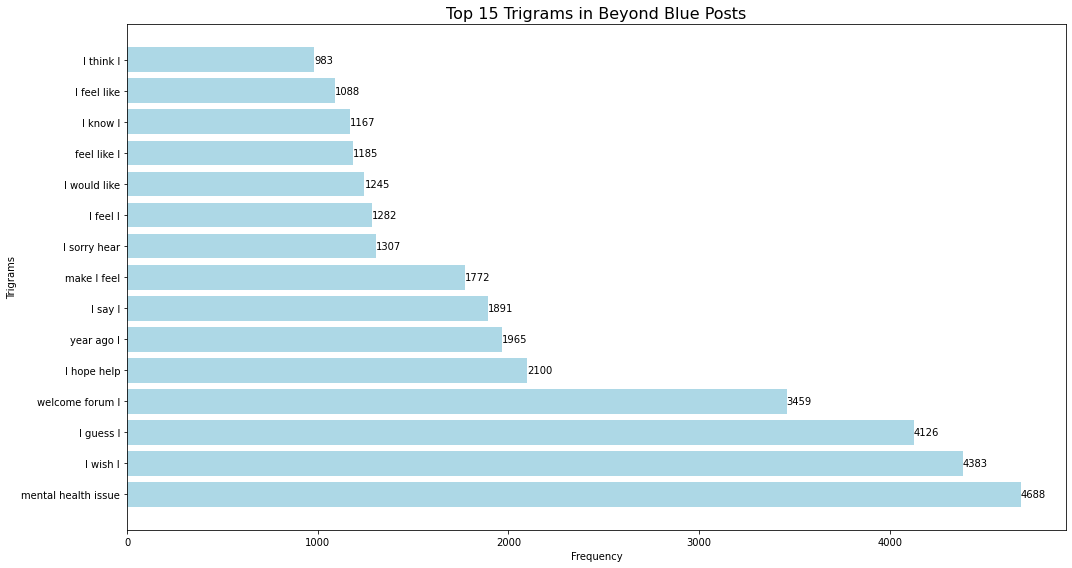

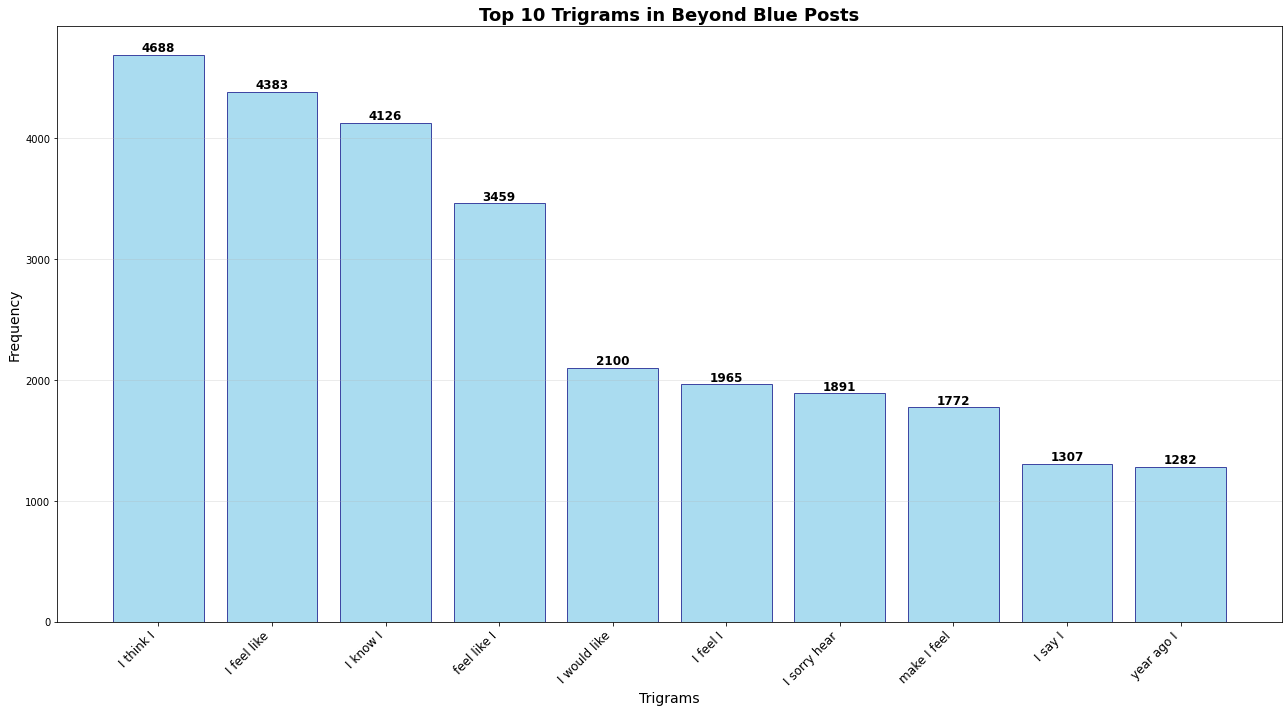

Top 50 trigrams saved to 'top_trigrams.csv'

Trigram Statistics:
Most frequent trigram: 'I think I' (4688 times)
Average trigram frequency: 1.88
Trigrams appearing only once: 2094770


In [33]:
# === TRIGRAM ANALYSIS AND VISUALIZATION ===
if len(all_trigrams) > 0:
    print("\n=== TOP TRIGRAMS ANALYSIS ===")
    
    # Get top trigrams
    top_trigrams = trigram_freq.most_common(30)
    
    # Display top trigrams
    print("Top 20 Trigrams:")
    for i, (trigram, freq) in enumerate(top_trigrams[:20], 1):
        print(f"{i:2d}. {trigram:<30} : {freq:4d}")
    
    # Plot top trigrams
    if len(top_trigrams) >= 15:
        trigrams, freqs = zip(*top_trigrams[:15])
        
        plt.figure(figsize=(15, 8))
        bars = plt.barh(range(len(trigrams)), freqs, color='lightblue')
        plt.title('Top 15 Trigrams in Beyond Blue Posts', fontsize=16)
        plt.xlabel('Frequency')
        plt.ylabel('Trigrams')
        plt.yticks(range(len(trigrams)), [t[:40] + '...' if len(t) > 40 else t for t in trigrams[::-1]])
        
        # Add frequency labels
        for i, (bar, freq) in enumerate(zip(bars, freqs)):
            plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                     str(freq), ha='left', va='center', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        # Create a more readable vertical bar chart
        plt.figure(figsize=(18, 10))
        bars = plt.bar(range(len(trigrams[:10])), freqs[:10], color='skyblue', edgecolor='navy', alpha=0.7)
        plt.title('Top 10 Trigrams in Beyond Blue Posts', fontsize=18, fontweight='bold')
        plt.xlabel('Trigrams', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(range(len(trigrams[:10])), trigrams[:10], rotation=45, ha='right', fontsize=12)
        
        # Add frequency labels on bars
        for bar, freq in zip(bars, freqs[:10]):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                     str(freq), ha='center', va='bottom', fontsize=12, fontweight='bold')
        
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Save trigrams data
        trigram_df = pd.DataFrame(top_trigrams[:50], columns=['trigram', 'frequency'])
        trigram_df.to_csv('top_trigrams.csv', index=False)
        print("Top 50 trigrams saved to 'top_trigrams.csv'")
    
    # Trigram statistics
    print(f"\nTrigram Statistics:")
    print(f"Most frequent trigram: '{trigram_freq.most_common(1)[0][0]}' ({trigram_freq.most_common(1)[0][1]} times)")
    print(f"Average trigram frequency: {np.mean(list(trigram_freq.values())):.2f}")
    print(f"Trigrams appearing only once: {sum(1 for freq in trigram_freq.values() if freq == 1)}")
else:
    print("No trigrams found for analysis")


=== TOP QUADGRAMS ANALYSIS ===
Top 20 Quadgrams:
 1. I feel like I                            : 2259
 2. I think I would                          :  590
 3. I wish I could                           :  460
 4. mental health care plan                  :  434
 5. suicide call back service                :  388
 6. beyond blue support service              :  383
 7. welcome beyond blue forum                :  375
 8. I sorry feel way                         :  362
 9. welcome forum I sorry                    :  357
10. sorry feel way I                         :  350
11. relate suicide self harm                 :  292
12. self harm time general                   :  290
13. harm time general supportive             :  289
14. kind regard sophie hi                    :  284
15. suicide self harm time                   :  283
16. time general supportive comment          :  281
17. issue relate suicide self                :  281
18. general supportive comment community     :  262
19. feel way I

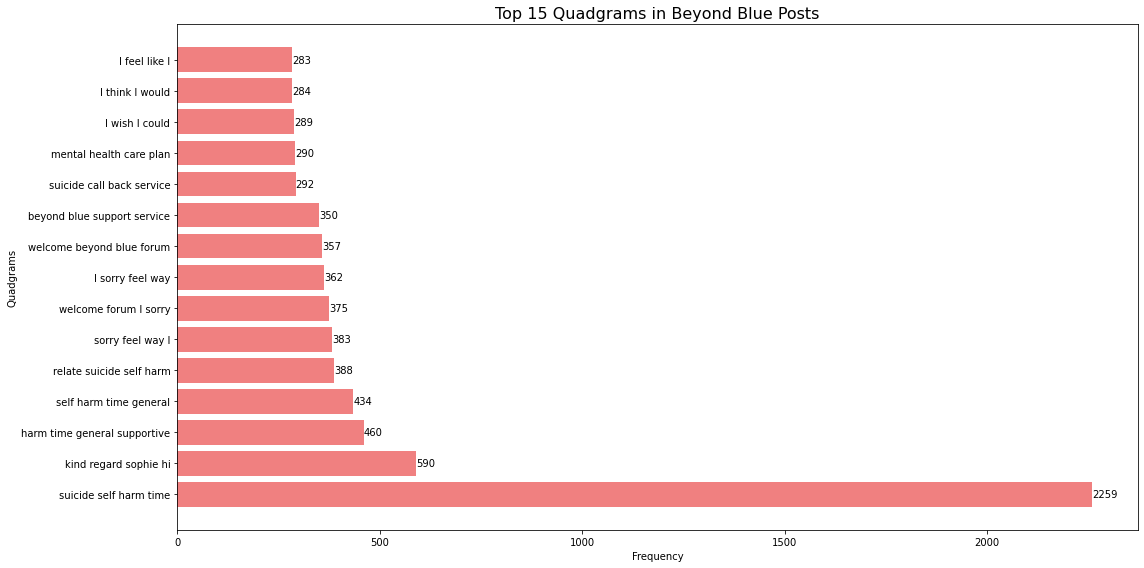

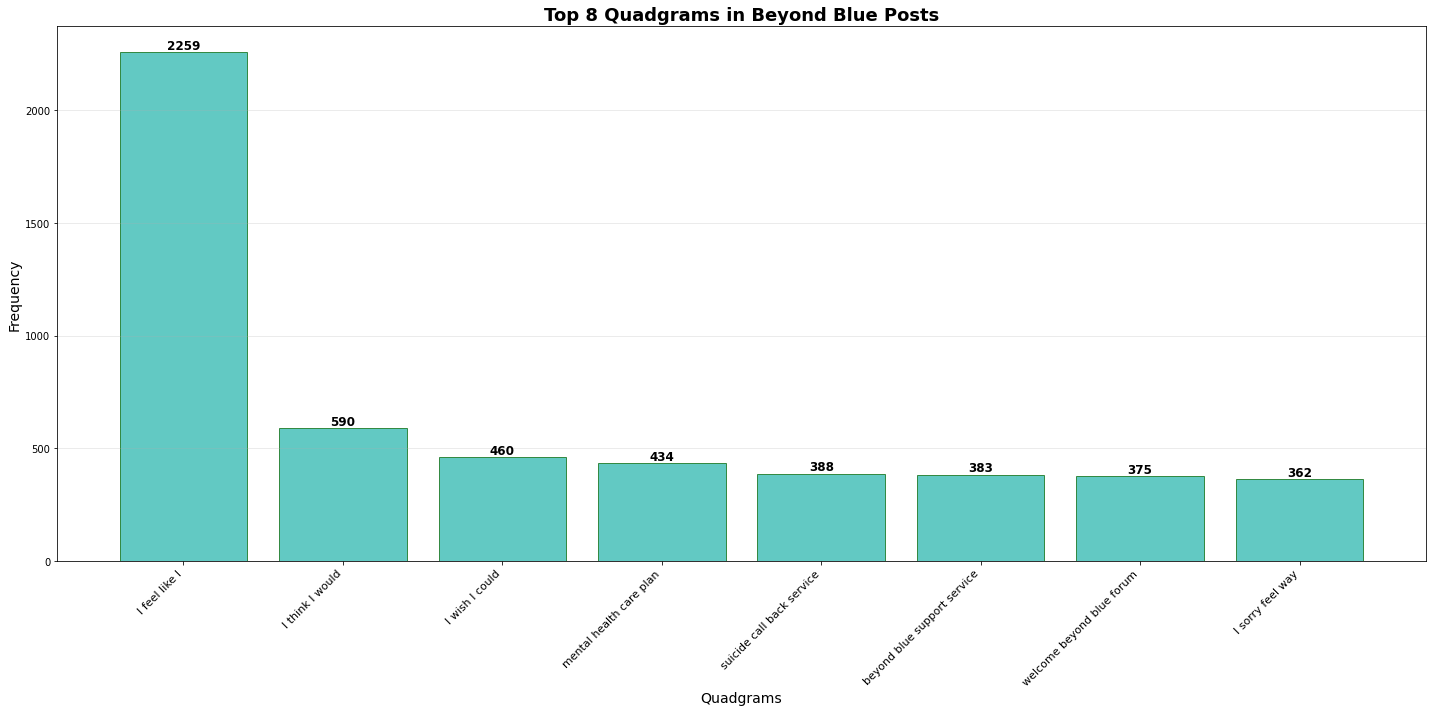

Top 50 quadgrams saved to 'top_quadgrams.csv'

Quadgram Statistics:
Most frequent quadgram: 'I feel like I' (2259 times)
Average quadgram frequency: 1.47
Quadgrams appearing only once: 2895057


In [34]:
# === QUADGRAM ANALYSIS AND VISUALIZATION ===
if len(all_quadgrams) > 0:
    print("\n=== TOP QUADGRAMS ANALYSIS ===")
    
    # Get top quadgrams
    top_quadgrams = quadgram_freq.most_common(30)
    
    # Display top quadgrams
    print("Top 20 Quadgrams:")
    for i, (quadgram, freq) in enumerate(top_quadgrams[:20], 1):
        print(f"{i:2d}. {quadgram:<40} : {freq:4d}")
    
    # Plot top quadgrams
    if len(top_quadgrams) >= 10:
        quadgrams, freqs = zip(*top_quadgrams[:15])
        
        plt.figure(figsize=(16, 8))
        bars = plt.barh(range(len(quadgrams)), freqs, color='lightcoral')
        plt.title('Top 15 Quadgrams in Beyond Blue Posts', fontsize=16)
        plt.xlabel('Frequency')
        plt.ylabel('Quadgrams')
        plt.yticks(range(len(quadgrams)), [q[:50] + '...' if len(q) > 50 else q for q in quadgrams[::-1]])
        
        # Add frequency labels
        for i, (bar, freq) in enumerate(zip(bars, freqs)):
            plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                     str(freq), ha='left', va='center', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        # Create a vertical bar chart for top 8 quadgrams
        plt.figure(figsize=(20, 10))
        bars = plt.bar(range(len(quadgrams[:8])), freqs[:8], color='lightseagreen', edgecolor='darkgreen', alpha=0.7)
        plt.title('Top 8 Quadgrams in Beyond Blue Posts', fontsize=18, fontweight='bold')
        plt.xlabel('Quadgrams', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(range(len(quadgrams[:8])), [q[:30] + '...' if len(q) > 30 else q for q in quadgrams[:8]], 
                   rotation=45, ha='right', fontsize=11)
        
        # Add frequency labels on bars
        for bar, freq in zip(bars, freqs[:8]):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                     str(freq), ha='center', va='bottom', fontsize=12, fontweight='bold')
        
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Save quadgrams data
        quadgram_df = pd.DataFrame(top_quadgrams[:50], columns=['quadgram', 'frequency'])
        quadgram_df.to_csv('top_quadgrams.csv', index=False)
        print("Top 50 quadgrams saved to 'top_quadgrams.csv'")
    
    # Quadgram statistics
    print(f"\nQuadgram Statistics:")
    print(f"Most frequent quadgram: '{quadgram_freq.most_common(1)[0][0]}' ({quadgram_freq.most_common(1)[0][1]} times)")
    print(f"Average quadgram frequency: {np.mean(list(quadgram_freq.values())):.2f}")
    print(f"Quadgrams appearing only once: {sum(1 for freq in quadgram_freq.values() if freq == 1)}")
else:
    print("No quadgrams found for analysis")

📏 ANALYZING BEYOND BLUE POST LENGTHS...
📊 Beyond Blue Post Length Statistics:
   Total posts with content: 12,000
   Average words per post: 993.5
   Median words per post: 835
   Shortest post: 29 words
   Longest post: 4240 words


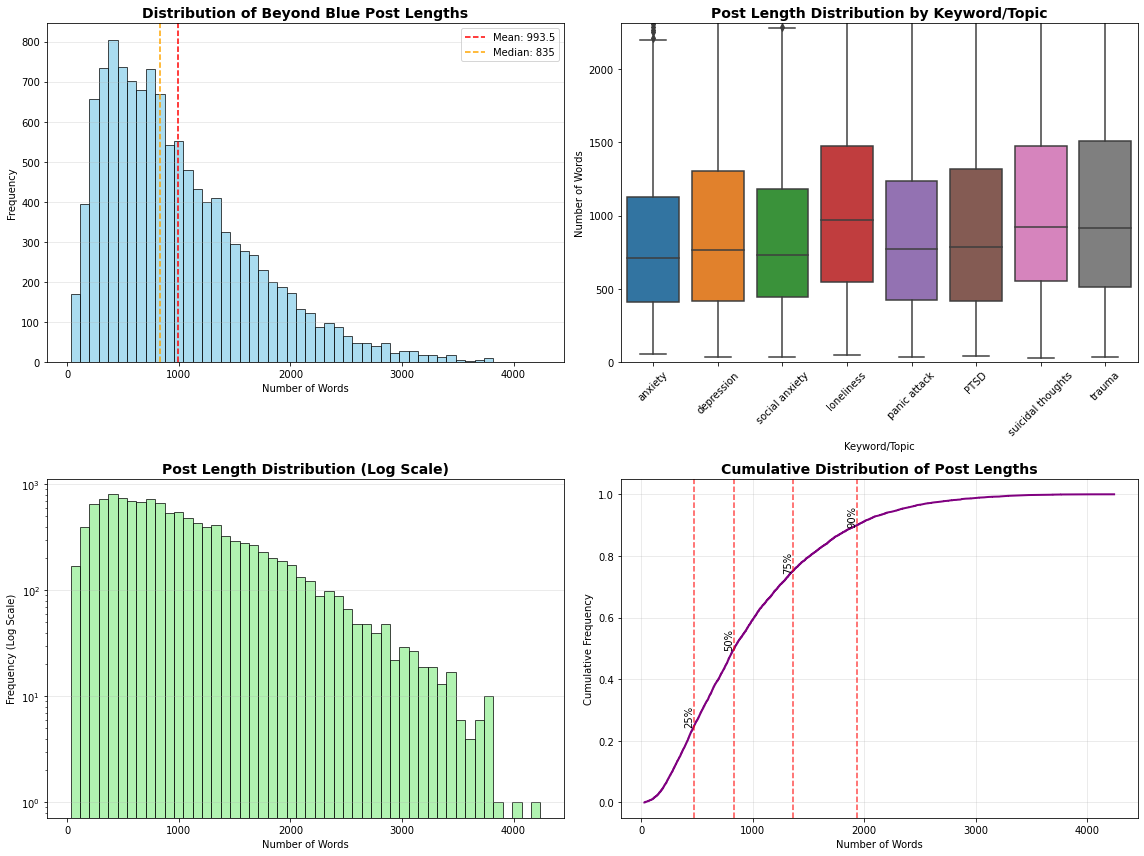

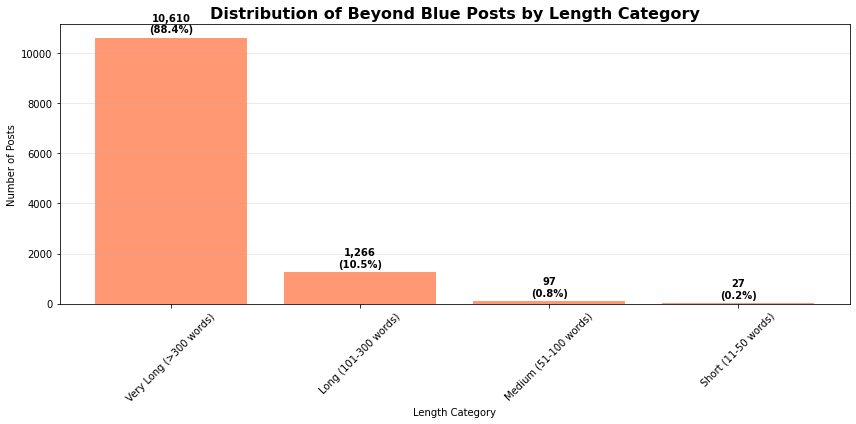


📈 Length Category Distribution:
   Very Long (>300 words): 10,610 posts (88.4%)
   Long (101-300 words): 1,266 posts (10.5%)
   Medium (51-100 words): 97 posts (0.8%)
   Short (11-50 words): 27 posts (0.2%)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

# 1. POST LENGTH ANALYSIS FOR BEYOND BLUE DATA
print("📏 ANALYZING BEYOND BLUE POST LENGTHS...")

# Calculate word counts for different text fields
df_bb['post_preview_word_count'] = df_bb['post_preview'].fillna('').apply(lambda x: len(str(x).split()))
df_bb['comments_word_count'] = df_bb['comments'].fillna('').apply(lambda x: len(str(x).split()))
df_bb['total_word_count'] = df_bb['post_preview_word_count'] + df_bb['comments_word_count']

# Remove posts with 0 words (likely deleted or empty posts)
df_content = df_bb[df_bb['total_word_count'] > 0].copy()

print(f"📊 Beyond Blue Post Length Statistics:")
print(f"   Total posts with content: {len(df_content):,}")
print(f"   Average words per post: {df_content['total_word_count'].mean():.1f}")
print(f"   Median words per post: {df_content['total_word_count'].median():.0f}")
print(f"   Shortest post: {df_content['total_word_count'].min()} words")
print(f"   Longest post: {df_content['total_word_count'].max()} words")

# Create comprehensive post length visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram of post lengths
axes[0, 0].hist(df_content['total_word_count'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(df_content['total_word_count'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df_content["total_word_count"].mean():.1f}')
axes[0, 0].axvline(df_content['total_word_count'].median(), color='orange', linestyle='--', 
                   label=f'Median: {df_content["total_word_count"].median():.0f}')
axes[0, 0].set_title('Distribution of Beyond Blue Post Lengths', fontweight='bold', fontsize=14)
axes[0, 0].set_xlabel('Number of Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Box plot of post lengths by keyword (top 8 keywords)
if 'keyword' in df_content.columns:
    top_keywords = df_content['keyword'].value_counts().head(8).index
    df_top_keywords = df_content[df_content['keyword'].isin(top_keywords)]
    
    sns.boxplot(data=df_top_keywords, x='keyword', y='total_word_count', ax=axes[0, 1])
    axes[0, 1].set_title('Post Length Distribution by Keyword/Topic', fontweight='bold', fontsize=14)
    axes[0, 1].set_xlabel('Keyword/Topic')
    axes[0, 1].set_ylabel('Number of Words')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].set_ylim(0, df_content['total_word_count'].quantile(0.95))

# 3. Log-scale histogram for better visualization
axes[1, 0].hist(df_content['total_word_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Post Length Distribution (Log Scale)', fontweight='bold', fontsize=14)
axes[1, 0].set_xlabel('Number of Words')
axes[1, 0].set_ylabel('Frequency (Log Scale)')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Cumulative distribution
sorted_lengths = np.sort(df_content['total_word_count'])
cumulative_freq = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
axes[1, 1].plot(sorted_lengths, cumulative_freq, linewidth=2, color='purple')
axes[1, 1].set_title('Cumulative Distribution of Post Lengths', fontweight='bold', fontsize=14)
axes[1, 1].set_xlabel('Number of Words')
axes[1, 1].set_ylabel('Cumulative Frequency')
axes[1, 1].grid(True, alpha=0.3)

# Add percentile lines
for percentile in [25, 50, 75, 90]:
    value = np.percentile(df_content['total_word_count'], percentile)
    axes[1, 1].axvline(value, color='red', linestyle='--', alpha=0.7)
    axes[1, 1].text(value, percentile/100, f'{percentile}%', rotation=90, ha='right')

plt.tight_layout()
plt.show()

# Length categories analysis
def categorize_length(word_count):
    if word_count <= 10:
        return 'Very Short (≤10 words)'
    elif word_count <= 50:
        return 'Short (11-50 words)'
    elif word_count <= 100:
        return 'Medium (51-100 words)'
    elif word_count <= 300:
        return 'Long (101-300 words)'
    else:
        return 'Very Long (>300 words)'

df_content['length_category'] = df_content['total_word_count'].apply(categorize_length)
length_dist = df_content['length_category'].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(length_dist.index, length_dist.values, color='coral', alpha=0.8)
plt.title('Distribution of Beyond Blue Posts by Length Category', fontweight='bold', fontsize=16)
plt.xlabel('Length Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)

# Add percentage labels on bars
total_posts = len(df_content)
for bar, count in zip(bars, length_dist.values):
    percentage = (count / total_posts) * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + total_posts*0.01, 
             f'{count:,}\n({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📈 Length Category Distribution:")
for category, count in length_dist.items():
    percentage = (count / total_posts) * 100
    print(f"   {category}: {count:,} posts ({percentage:.1f}%)")


😊 ANALYZING BEYOND BLUE SENTIMENT DISTRIBUTION...
🔄 Computing sentiment scores...

📊 Beyond Blue Sentiment Distribution:
   Positive: 7,735 posts (64.5%)
   Neutral: 4,204 posts (35.0%)
   Negative: 61 posts (0.5%)


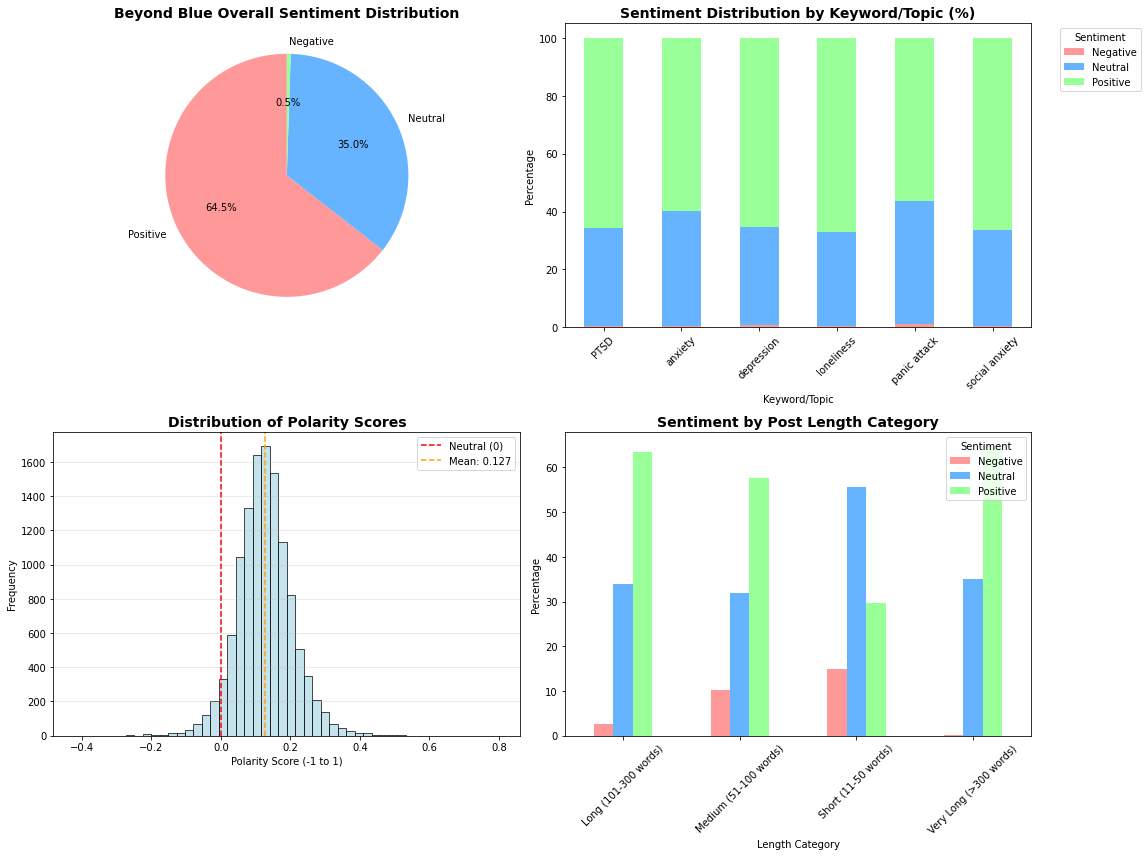


🔍 Beyond Blue Sentiment Insights:
   Average polarity: 0.127
   Average subjectivity: 0.520
   Most positive topic: PTSD (avg polarity: 0.135)
   Most negative topic: panic attack (avg polarity: 0.112)

📈 Sentiment by Mental Health Topics:
   anxiety (1000 posts, avg polarity: 0.118):
     Positive: 597 (59.7%)
     Neutral: 399 (39.9%)
     Negative: 4 (0.4%)
   depression (1000 posts, avg polarity: 0.132):
     Positive: 653 (65.3%)
     Neutral: 338 (33.8%)
     Negative: 9 (0.9%)
   social anxiety (1000 posts, avg polarity: 0.128):
     Positive: 663 (66.3%)
     Neutral: 334 (33.4%)
     Negative: 3 (0.3%)
   loneliness (1000 posts, avg polarity: 0.131):
     Positive: 670 (67.0%)
     Neutral: 325 (32.5%)
     Negative: 5 (0.5%)
   panic attack (1000 posts, avg polarity: 0.112):
     Positive: 564 (56.4%)
     Neutral: 425 (42.5%)
     Negative: 11 (1.1%)
   PTSD (1000 posts, avg polarity: 0.135):
     Positive: 656 (65.6%)
     Neutral: 341 (34.1%)
     Negative: 3 (0.3%)
   su

In [7]:
# 2. SENTIMENT ANALYSIS FOR BEYOND BLUE DATA
print("\n😊 ANALYZING BEYOND BLUE SENTIMENT DISTRIBUTION...")

# Function to get sentiment using TextBlob
def get_sentiment(text):
    if pd.isna(text) or text == '':
        return 0, 0  # neutral sentiment for empty text
    try:
        blob = TextBlob(str(text))
        return blob.sentiment.polarity, blob.sentiment.subjectivity
    except:
        return 0, 0

# Use the already cleaned text from the cleaning process
df_content['analysis_text'] = df_content['clean_text'].fillna('')

# Get sentiment scores
print("🔄 Computing sentiment scores...")
sentiment_results = df_content['analysis_text'].apply(get_sentiment)
df_content['polarity'] = [x[0] for x in sentiment_results]
df_content['subjectivity'] = [x[1] for x in sentiment_results]

# Categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_content['sentiment_category'] = df_content['polarity'].apply(categorize_sentiment)

# Sentiment distribution
sentiment_dist = df_content['sentiment_category'].value_counts()
sentiment_percentages = (sentiment_dist / len(df_content) * 100).round(1)

print(f"\n📊 Beyond Blue Sentiment Distribution:")
for sentiment, count in sentiment_dist.items():
    percentage = sentiment_percentages[sentiment]
    print(f"   {sentiment}: {count:,} posts ({percentage}%)")

# Create comprehensive sentiment visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Pie chart of sentiment distribution
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Red, Blue, Green
wedges, texts, autotexts = axes[0, 0].pie(sentiment_dist.values, labels=sentiment_dist.index, 
                                         autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 0].set_title('Beyond Blue Overall Sentiment Distribution', fontweight='bold', fontsize=14)

# 2. Sentiment by keyword/topic (top 6 keywords)
if 'keyword' in df_content.columns:
    top_6_keywords = df_content['keyword'].value_counts().head(6).index
    df_top6 = df_content[df_content['keyword'].isin(top_6_keywords)]
    
    sentiment_by_keyword = df_top6.groupby(['keyword', 'sentiment_category']).size().unstack(fill_value=0)
    sentiment_by_keyword_pct = sentiment_by_keyword.div(sentiment_by_keyword.sum(axis=1), axis=0) * 100
    
    sentiment_by_keyword_pct.plot(kind='bar', stacked=True, ax=axes[0, 1], 
                                 color=['#ff9999', '#66b3ff', '#99ff99'])
    axes[0, 1].set_title('Sentiment Distribution by Keyword/Topic (%)', fontweight='bold', fontsize=14)
    axes[0, 1].set_xlabel('Keyword/Topic')
    axes[0, 1].set_ylabel('Percentage')
    axes[0, 1].legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Polarity score distribution
axes[1, 0].hist(df_content['polarity'], bins=50, alpha=0.7, color='lightblue', edgecolor='black')
axes[1, 0].axvline(0, color='red', linestyle='--', label='Neutral (0)')
axes[1, 0].axvline(df_content['polarity'].mean(), color='orange', linestyle='--', 
                   label=f'Mean: {df_content["polarity"].mean():.3f}')
axes[1, 0].set_title('Distribution of Polarity Scores', fontweight='bold', fontsize=14)
axes[1, 0].set_xlabel('Polarity Score (-1 to 1)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Sentiment vs Post Length
length_sentiment = df_content.groupby(['length_category', 'sentiment_category']).size().unstack(fill_value=0)
length_sentiment_pct = length_sentiment.div(length_sentiment.sum(axis=1), axis=0) * 100

length_sentiment_pct.plot(kind='bar', ax=axes[1, 1], color=['#ff9999', '#66b3ff', '#99ff99'])
axes[1, 1].set_title('Sentiment by Post Length Category', fontweight='bold', fontsize=14)
axes[1, 1].set_xlabel('Length Category')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(title='Sentiment')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Additional sentiment insights
print(f"\n🔍 Beyond Blue Sentiment Insights:")
print(f"   Average polarity: {df_content['polarity'].mean():.3f}")
print(f"   Average subjectivity: {df_content['subjectivity'].mean():.3f}")

if 'keyword' in df_content.columns and len(df_top6) > 0:
    keyword_sentiment = df_top6.groupby('keyword')['polarity'].mean().sort_values(ascending=False)
    print(f"   Most positive topic: {keyword_sentiment.index[0]} (avg polarity: {keyword_sentiment.iloc[0]:.3f})")
    print(f"   Most negative topic: {keyword_sentiment.index[-1]} (avg polarity: {keyword_sentiment.iloc[-1]:.3f})")

# Sentiment by mental health topics
print(f"\n📈 Sentiment by Mental Health Topics:")
if 'keyword' in df_content.columns:
    topic_sentiment_summary = df_content.groupby('keyword').agg({
        'sentiment_category': lambda x: x.value_counts().to_dict(),
        'polarity': ['mean', 'count']
    }).round(3)
    
    # Show top 10 topics by post count
    top_topics = df_content['keyword'].value_counts().head(10)
    for topic in top_topics.index:
        topic_data = df_content[df_content['keyword'] == topic]
        sentiment_counts = topic_data['sentiment_category'].value_counts()
        avg_polarity = topic_data['polarity'].mean()
        total_posts = len(topic_data)
        
        print(f"   {topic} ({total_posts} posts, avg polarity: {avg_polarity:.3f}):")
        for sentiment in ['Positive', 'Neutral', 'Negative']:
            count = sentiment_counts.get(sentiment, 0)
            pct = (count / total_posts * 100) if total_posts > 0 else 0
            print(f"     {sentiment}: {count} ({pct:.1f}%)")

# Temporal sentiment analysis (if post_date is available)
if 'post_date' in df_content.columns:
    print(f"\n📅 Temporal Sentiment Analysis:")
    df_content['post_date'] = pd.to_datetime(df_content['post_date'], errors='coerce')
    df_temporal = df_content.dropna(subset=['post_date'])
    
    if len(df_temporal) > 0:
        df_temporal['year_month'] = df_temporal['post_date'].dt.to_period('M')
        monthly_sentiment = df_temporal.groupby('year_month')['polarity'].mean()
        
        plt.figure(figsize=(12, 6))
        monthly_sentiment.plot(kind='line', marker='o', linewidth=2, markersize=6, color='purple')
        plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Neutral')
        plt.title('Average Sentiment Over Time (Beyond Blue)', fontweight='bold', fontsize=16)
        plt.xlabel('Month')
        plt.ylabel('Average Polarity Score')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        print(f"   Sentiment trend: {monthly_sentiment.iloc[-1]:.3f} (latest month)")
        print(f"   Most positive month: {monthly_sentiment.idxmax()} ({monthly_sentiment.max():.3f})")
        print(f"   Most negative month: {monthly_sentiment.idxmin()} ({monthly_sentiment.min():.3f})")